${\Huge \text{Basic analysis}}$ <br /><br />
${\Large \text{Pierre Guilmin}}$  
$\text{December 2018}$

**Goal:** First look at the final data `data/processed/annotated_final_IMPACT_mutations_20181105.txt`. This notebook focuses on the analysis of the dataset feature per feature.

IMPACT was re-annotated with VEP, so we wont study some base features (like `Consequence`) which are redundant with VEP features (`VEP_Consequence`). The *Somatic-driver* features group (`is_a_hotspot`, `is_a_3d_hotspot`, `oncogenic`, `gene_type`) is studied in the `oncokb_annotations_analysis.ipynb` notebook.

This notebook is divided in 6 parts:
* **1. Genome features**
* **2. NGS features**
* **3. ID features**
* **4. Consequence features**
* **5. Other features**
* **6. Contingency tables**

***

In [1]:
source("../../utils/r/custom_tools.R")
setup_environment("../../utils/r")

In [2]:
# load dataset
impact <- read.table("../../data/processed/annotated_final_IMPACT_mutations_20181105.txt",
                     sep = "\t", stringsAsFactors = FALSE, header = TRUE)
print_size(impact)
head(impact)

Size of impact: 225022 x 55

Hugo_Symbol Chromosome Start_Position End_Position Consequence      
1 TP53        17           7577515        7577515    nonsynonymous_SNV
2 PIK3R3      1           46521514       46521514    nonsynonymous_SNV
3 ATR         3          142178126      142178126    nonsynonymous_SNV
4 PDGFRA      4           55139732       55139732    nonsynonymous_SNV
5 FBXW7       4          153249542      153249542    splicing         
6 FBXW7       4          153332775      153332775    stopgain_SNV     
  Variant_Type Reference_Allele Tumor_Seq_Allele2 Tumor_Sample_Barcode
1 SNP          T                G                 P-0000012-T02-IM3   
2 SNP          G                C                 P-0000012-T03-IM3   
3 SNP          C                A                 P-0000012-T03-IM3   
4 SNP          T                A                 P-0000012-T03-IM3   
5 SNP          C                A                 P-0000012-T03-IM3   
6 SNP          C                A                 P-0000012-T03-IM3   
  cDNA_change HGVSp_Short t_depth t_vaf   t_alt_count n_depth n_vaf  
1 c.766A>C    p.T256P     227     0.50220 114          569    0.00000
2 c.894C>G    p.I298M     733     0.17599 129         1243    0.00000
3 c.7292G>T   p.R2431M    482     0.17427  84          581    0.00172
4 c.1393T>A   p.L465M     570     0.20351 116          811    0.00000
5 c.1237-1G>T             333     0.25526  85          458    0.00000
6 c.181G>T    p.G61*      570     0.22807 130          908    0.00000
  n_alt_count t_ref_plus_count t_ref_neg_count t_alt_plus_count t_alt_neg_count
1 0            59               54             58               56             
2 0           288              316             61               68             
3 1           221              177             46               38             
4 0           252              202             66               50             
5 0            69              179             24               61             
6 0           243              197             70               60             
  confidence_class sample_coverage variant_caller_cv mut_key        
1 AUTO_OK          344             MUTECT_ANNOVAR    17_7577515_T_G 
2 AUTO_OK          428             MUTECT_ANNOVAR    1_46521514_G_C 
3 AUTO_OK          428             MUTECT_ANNOVAR    3_142178126_C_A
4 AUTO_OK          428             MUTECT_ANNOVAR    4_55139732_T_A 
5 AUTO_OK          428             MUTECT_ANNOVAR    4_153249542_C_A
6 AUTO_OK          428             MUTECT_ANNOVAR    4_153332775_C_A
  VEP_Consequence         VEP_SYMBOL VEP_HGVSc   VEP_HGVSp VEP_VARIANT_CLASS
1 missense_variant        TP53       c.766A>C    p.T256P   SNV              
2 missense_variant        PIK3R3     c.894C>G    p.I298M   SNV              
3 missense_variant        ATR        c.7292G>T   p.R2431M  SNV              
4 missense_variant        PDGFRA     c.1393T>A   p.L465M   SNV              
5 splice_acceptor_variant FBXW7      c.1237-1G>T unknown   SNV              
6 stop_gained             FBXW7      c.181G>T    p.G61*    SNV              
  VEP_IMPACT VEP_CLIN_SIG VEP_COSMIC_CNT VEP_gnomAD_AF
1 MODERATE   unknown      1              0.000e+00    
2 MODERATE   unknown      0              0.000e+00    
3 MODERATE   unknown      0              4.063e-06    
4 MODERATE   unknown      0              0.000e+00    
5 HIGH       unknown      0              0.000e+00    
6 HIGH       unknown      0              0.000e+00    
  sample_mut_key                    patient_key frequency_in_normals
1 P-0000012-T02-IM3_17_7577515_T_G  P-0000012   0                   
2 P-0000012-T03-IM3_1_46521514_G_C  P-0000012   0                   
3 P-0000012-T03-IM3_3_142178126_C_A P-0000012   0                   
4 P-0000012-T03-IM3_4_55139732_T_A  P-0000012   0                   
5 P-0000012-T03-IM3_4_153249542_C_A P-0000012   0                   
6 P-0000012-T03-IM3_4_153332775_C_A P-0000012   0                   
  VEP_SIFT_class VEP_SIFT_score VEP_PolyPhen_class VEP_PolyPhen_scor

# Genome features

## `Chromosome`

In [3]:
length(unique(impact$Chromosome)) # number of different chromosomes

[1] 23

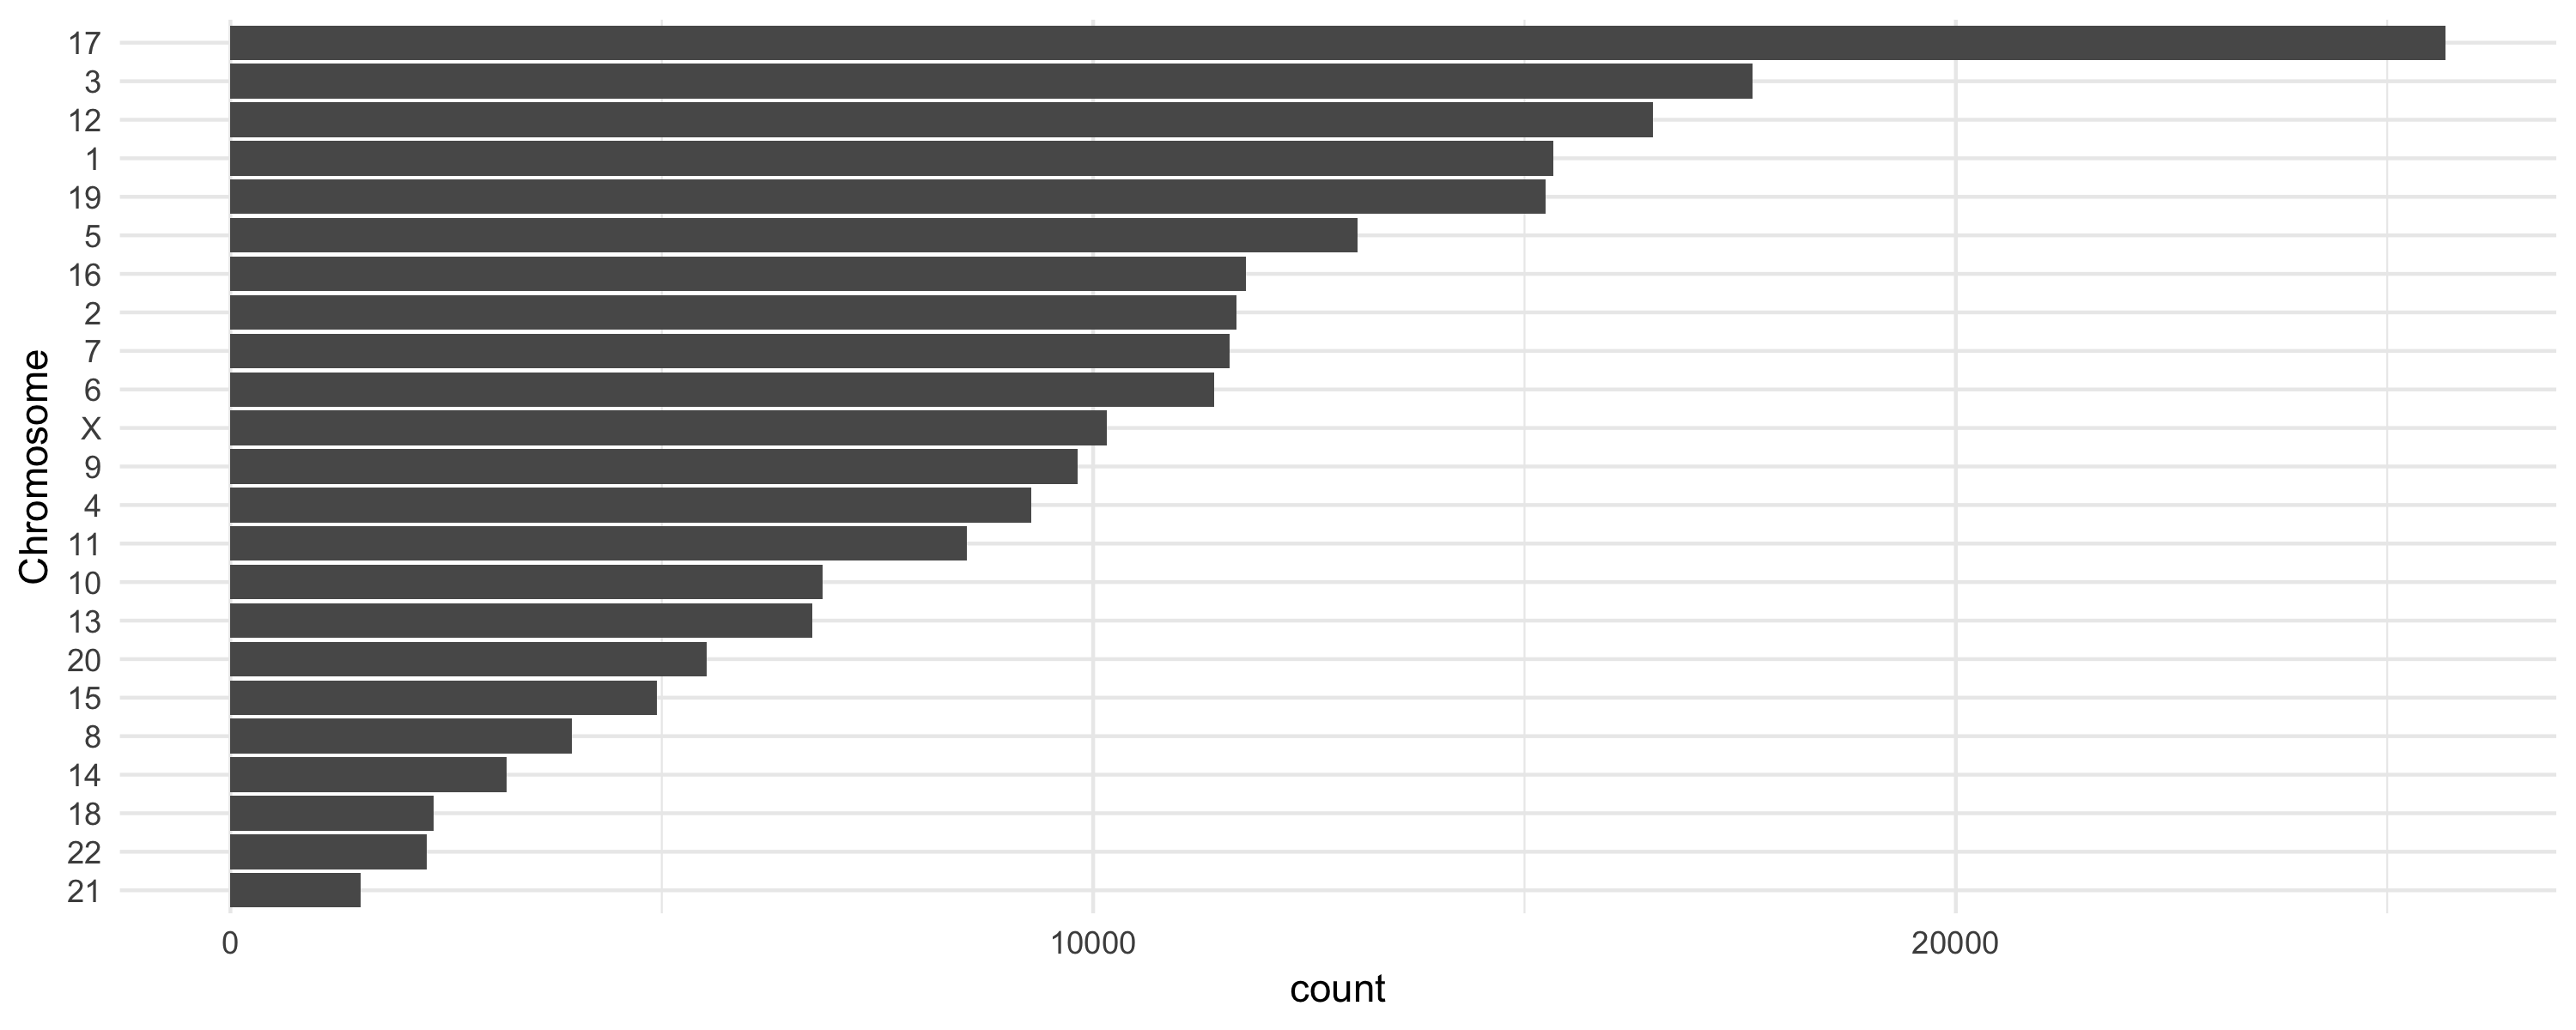

In [4]:
plot_histogram(impact, "Chromosome", flip = TRUE, height = 4)

## `VEP_SYMBOL`

In [5]:
length(unique(impact$VEP_SYMBOL)) # number of unique genes

[1] 496

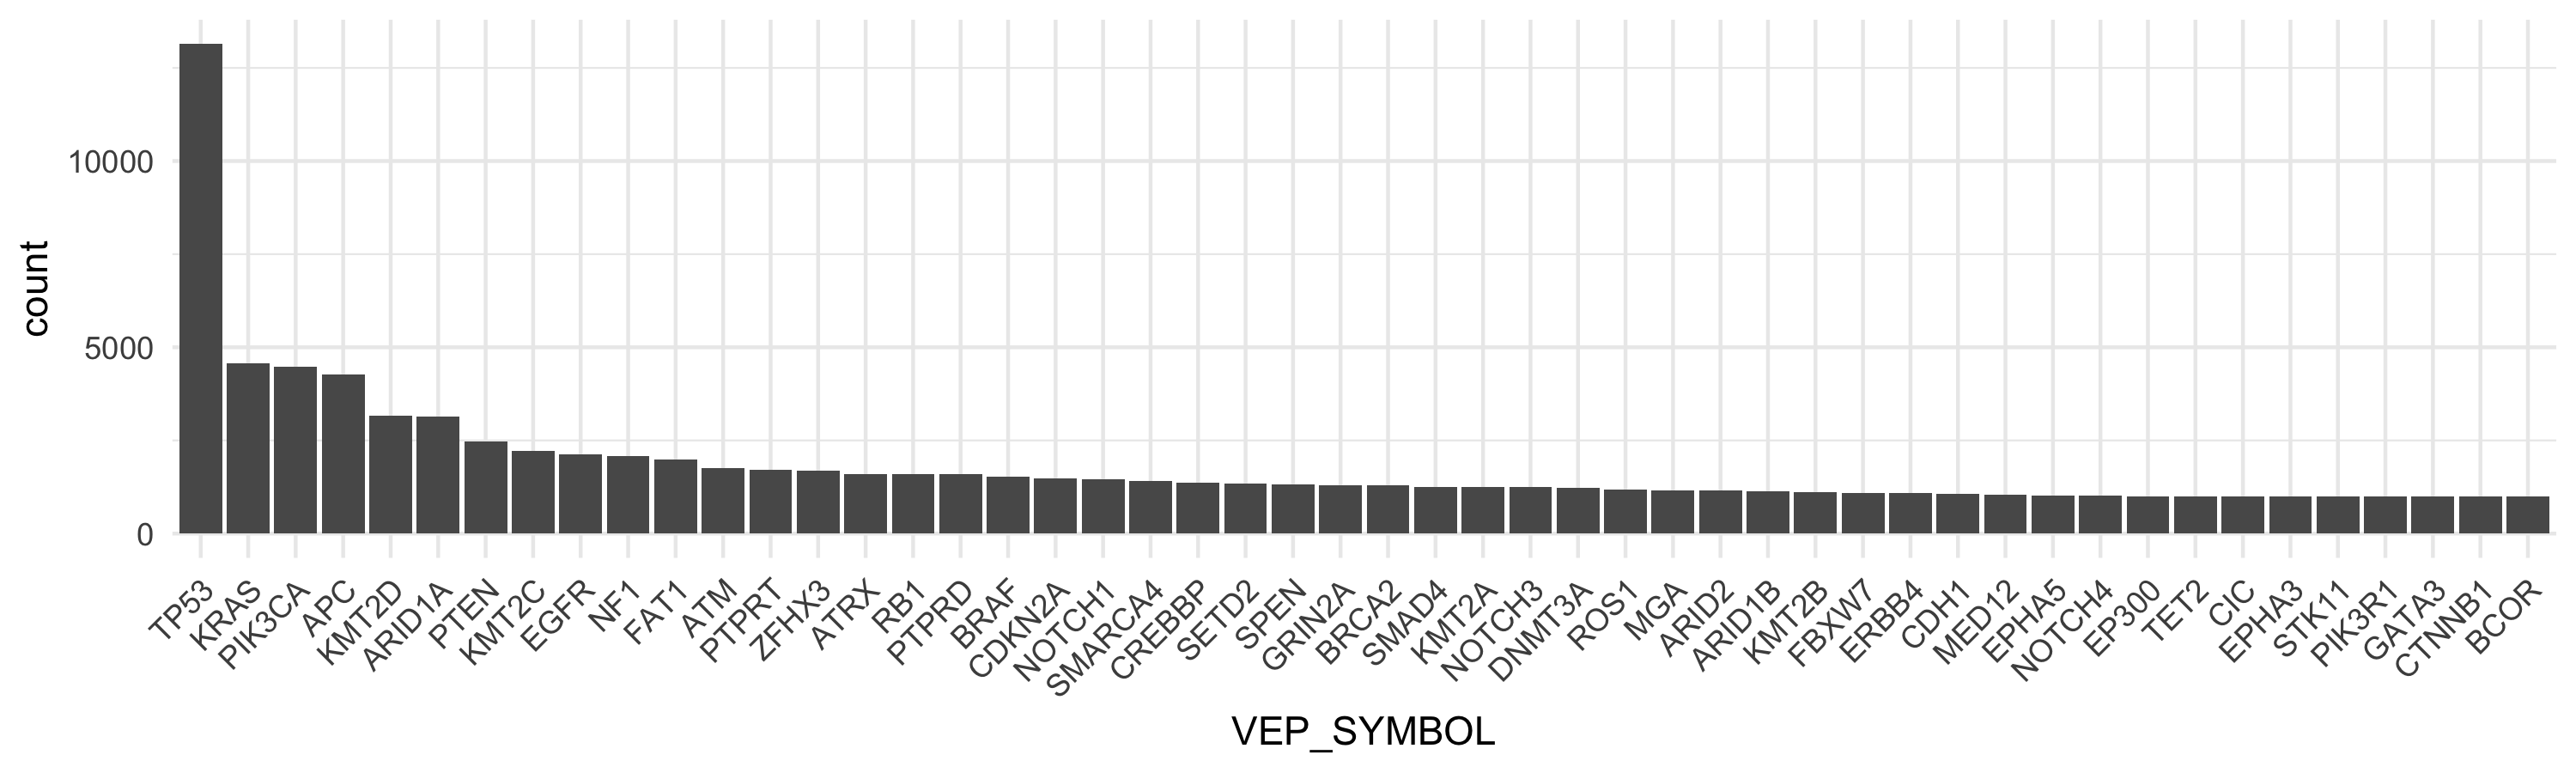

In [6]:
# top 50 mutated genes
plot_histogram_top(impact, "VEP_SYMBOL", 50) + tilt_x_label(45)

## `VEP_VARIANT_CLASS`

values              count  freq 
1 SNV                 185372 82.4%
2 deletion             26039 11.6%
3 insertion             8843 3.9% 
4 substitution          3678 1.6% 
5 indel                 1089 0.5% 
6 sequence_alteration      1 0%   
7 -- total --         225022 100%

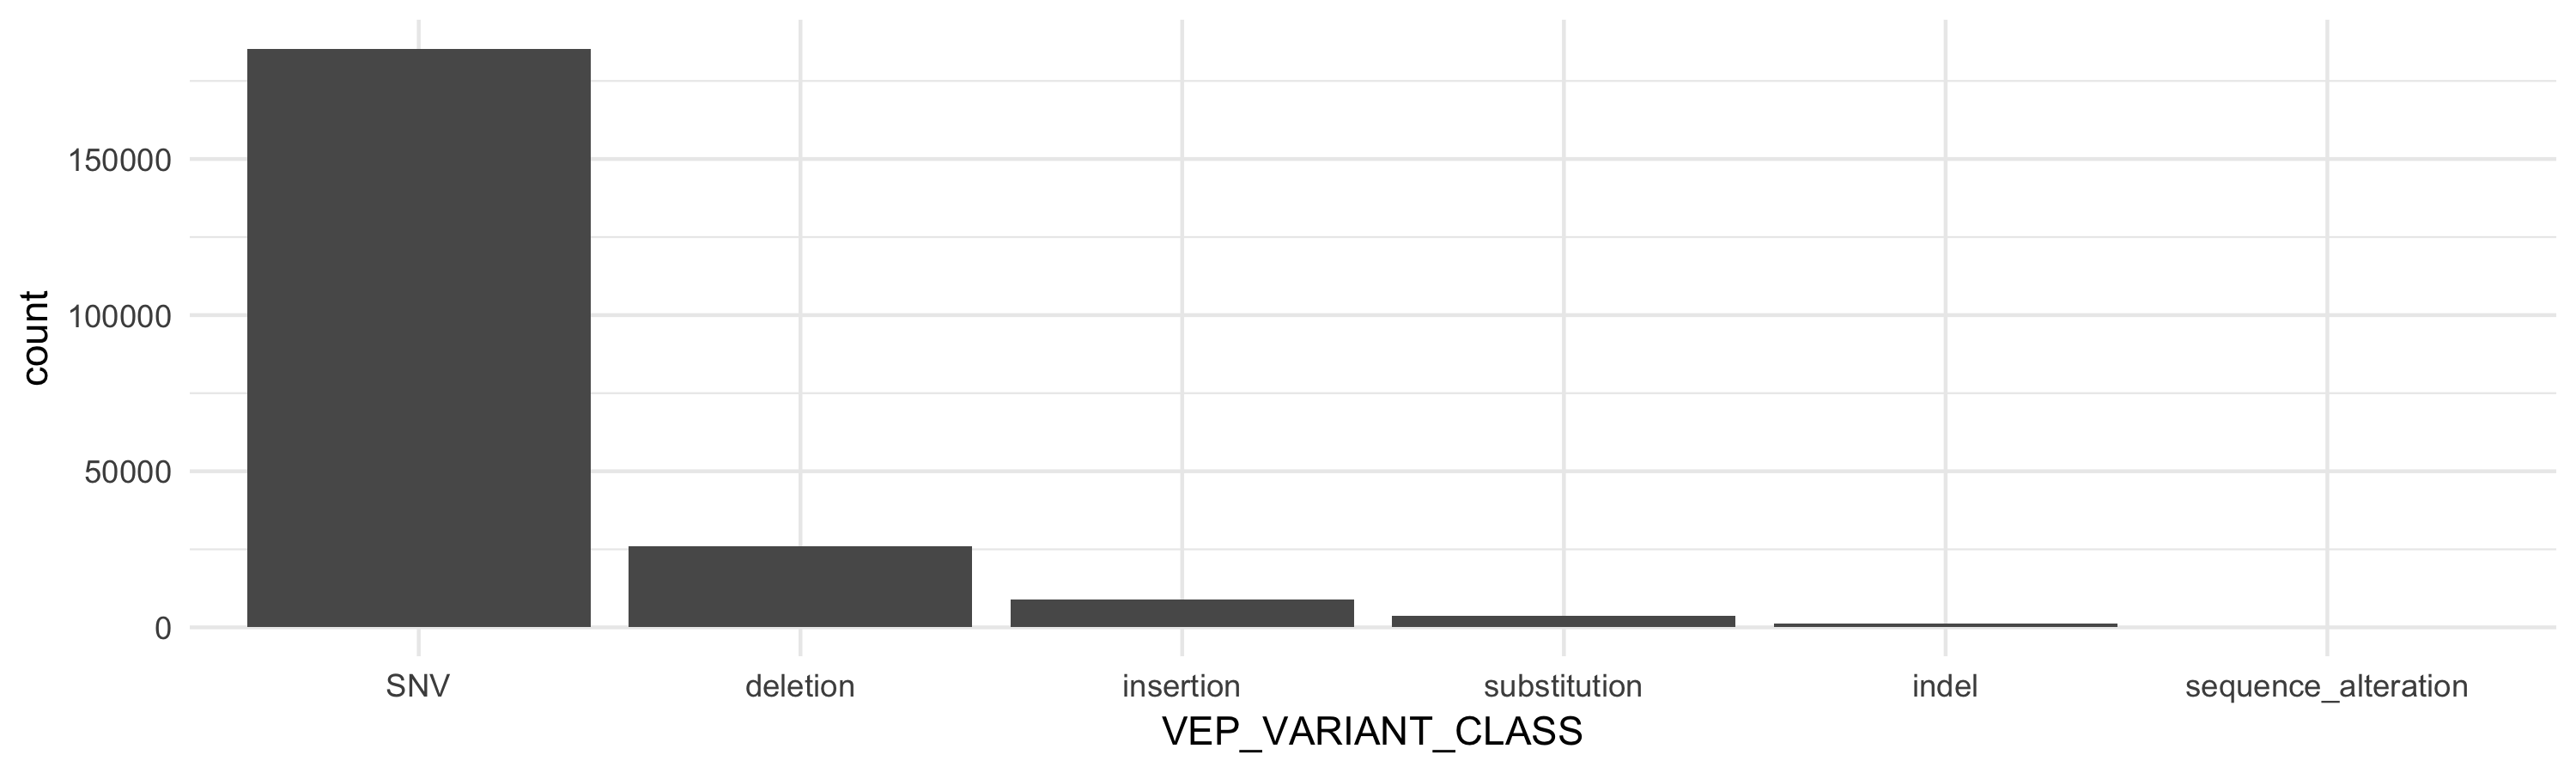

In [7]:
get_table(impact$VEP_VARIANT_CLASS)
plot_histogram(impact, "VEP_VARIANT_CLASS")

In [8]:
impact[impact$VEP_VARIANT_CLASS == "sequence_alteration",]

Hugo_Symbol Chromosome Start_Position End_Position Consequence        
40168 KIT         4          55593601       55593615     frameshift_deletion
      Variant_Type Reference_Allele Tumor_Seq_Allele2 Tumor_Sample_Barcode
40168 DEL          AGTGGAAGGTTGTT   GTGGA             P-0006875-T01-IM5   
      cDNA_change            HGVSp_Short         t_depth t_vaf   t_alt_count
40168 c.1667_1680delinsGTGGA p.Q556_V560delinsRG 757     0.35931 272        
      n_depth n_vaf n_alt_count t_ref_plus_count t_ref_neg_count
40168 348     0     0           254              230            
      t_alt_plus_count t_alt_neg_count confidence_class sample_coverage
40168 132              140             AUTO_OK          878            
      variant_caller_cv    mut_key                          VEP_Consequence   
40168 SOMATICINDEL_ANNOVAR 4_55593601_AGTGGAAGGTTGTT _GTGGA frameshift_variant
      VEP_SYMBOL VEP_HGVSc              VEP_HGVSp   VEP_VARIANT_CLASS  
40168 KIT        c.1667_1681delinsGTGGA p.Q556Rfs*5 sequence_alteration
      VEP_IMPACT VEP_CLIN_SIG VEP_COSMIC_CNT VEP_gnomAD_AF
40168 HIGH       unknown      0              0            
      sample_mut_key                                     patient_key
40168 P-0006875-T01-IM5_4_55593601_AGTGGAAGGTTGTT _GTGGA P-0006875  
      frequency_in_normals VEP_SIFT_class VEP_SIFT_score VEP_PolyPhen_class
40168 0                    unknown        NA             unknown           
      VEP_PolyPhen_score VEP_in_dbSNP VEP_gnomAD_total_AF_AFR
40168 NA                 FALSE        0                      
      VEP_gnomAD_total_AF_AMR VEP_gnomAD_total_AF_ASJ VEP_gnomAD_total_AF_EAS
40168 0                       0                       0                      
      VEP_gnomAD_total_AF_FIN VEP_gnomAD_total_AF_NFE VEP_gnomAD_total_AF_OTH
40168 0                       0                       0                      
      VEP_gnomAD_total_AF_max VEP_gnomAD_total_AF is_a_hotspot is_a_3d_hotspot
40168 0                       0                   unknown      unknown        
      oncogenic gene_type
40168 Unknown   oncogene

# NGS features

## `t_depth`, `n_depth`

In [9]:
summary(impact[, c("t_depth", "n_depth")])

    t_depth           n_depth      
 Min.   :   20.0   Min.   :  20.0  
 1st Qu.:  452.0   1st Qu.: 359.0  
 Median :  642.0   Median : 487.0  
 Mean   :  705.5   Mean   : 511.4  
 3rd Qu.:  867.0   3rd Qu.: 638.0  
 Max.   :47147.0   Max.   :5958.0  

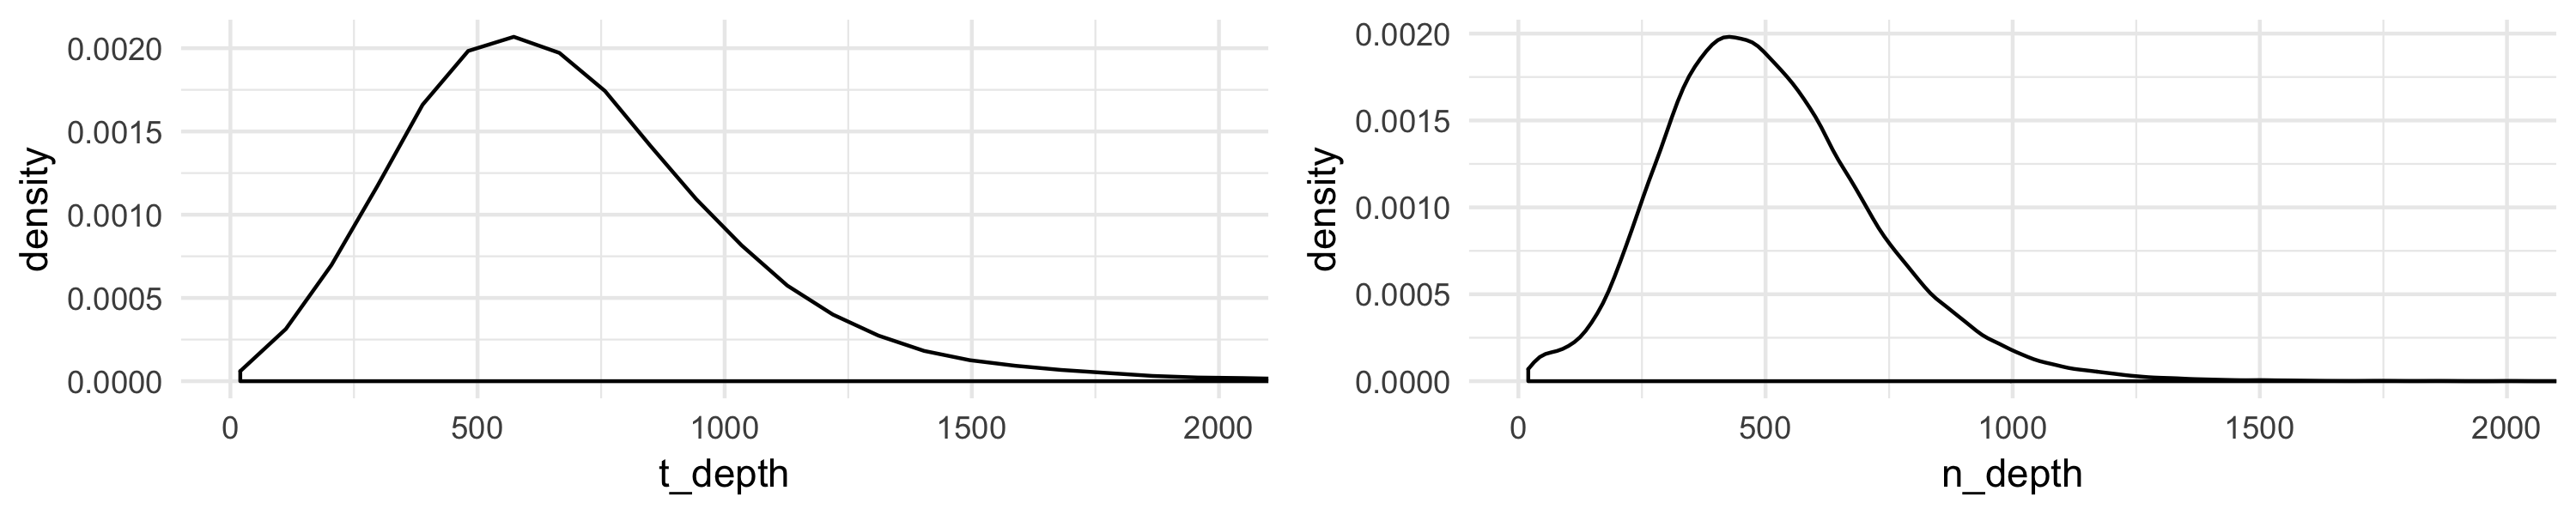

In [10]:
plot1 <- plot_density(impact, "t_depth") + coord_cartesian(xlim = c(0, 2000))
plot2 <- plot_density(impact, "n_depth") + coord_cartesian(xlim = c(0, 2000))
plot_side_by_side(plot1, plot2)

## `t_vaf`, `n_vaf`

In [11]:
summary(impact[, c("t_vaf", "n_vaf")])

     t_vaf            n_vaf         
 Min.   :0.0010   Min.   :0.000000  
 1st Qu.:0.1130   1st Qu.:0.000000  
 Median :0.2020   Median :0.000000  
 Mean   :0.2414   Mean   :0.002036  
 3rd Qu.:0.3232   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.000000  

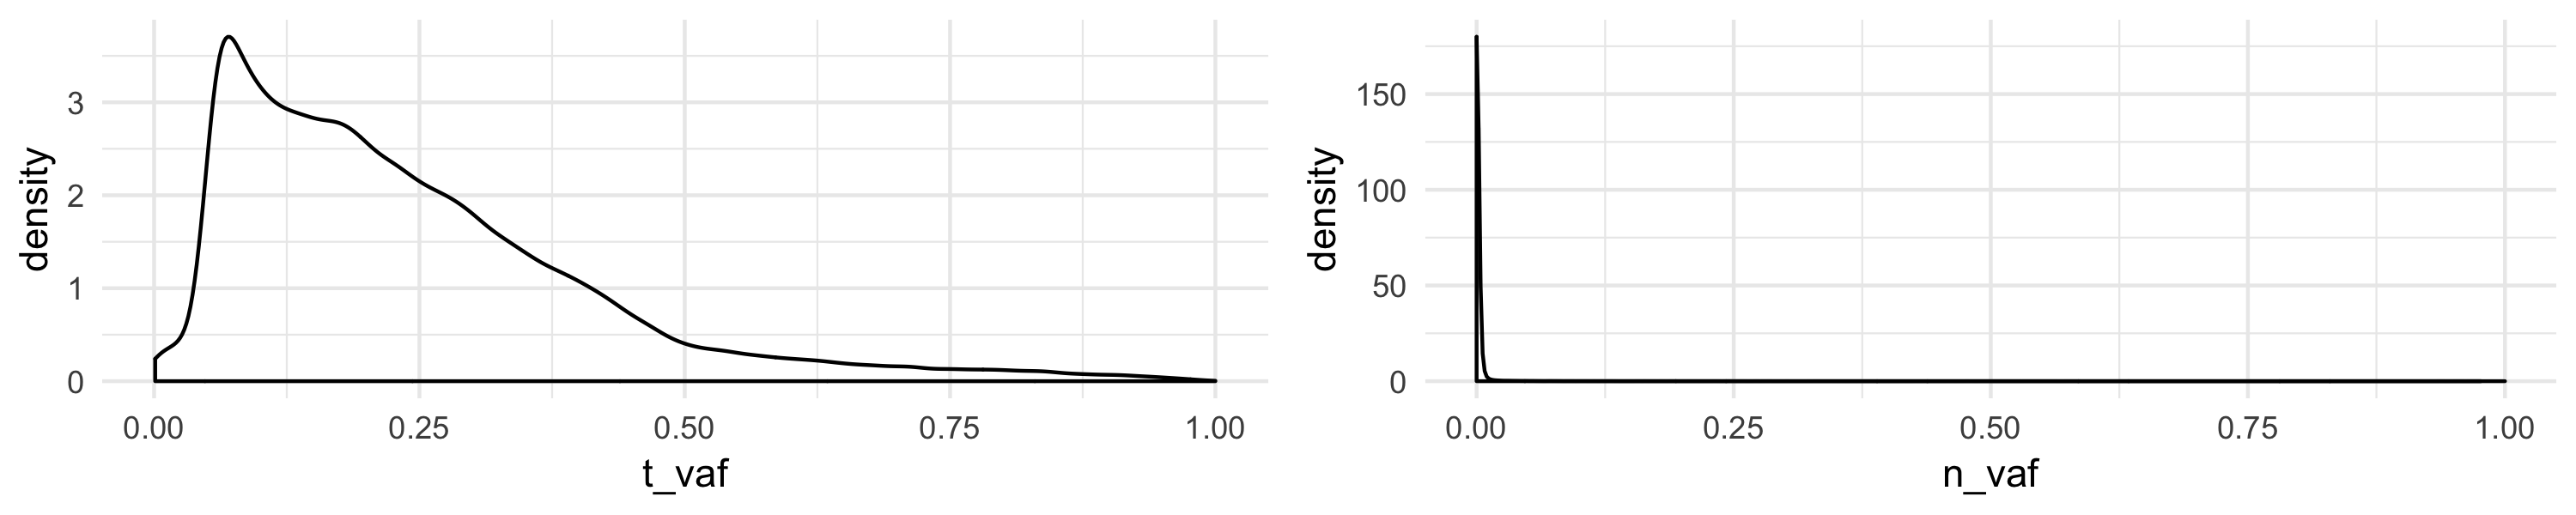

In [12]:
plot1 <- plot_density(impact, "t_vaf")
plot2 <- plot_density(impact, "n_vaf")
plot_side_by_side(plot1, plot2)

## `sample_coverage`

In [13]:
summary(impact$sample_coverage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  201.0   563.0   695.0   703.3   838.0  2778.0 

In [14]:
# get the number n of unique sample_coverage values per Tumor_Sample_Barcode, count the rows where n != 1
nrow(impact %>% group_by(Tumor_Sample_Barcode) %>%
                summarise(n = length(unique(sample_coverage))) %>%
                filter(n != 1))

[1] 0

This shows that the `sample_coverage` feature is not a row dependant feature but a feature for each `Tumor_Sample_Barcode`, e.g. each tumor sample. It is an indicator of quality, for a definition see the [Coverage Wikipedia article](https://en.wikipedia.org/wiki/Coverage_%28genetics%29):  
"It is defined as
$$\text{coverage}\ =\ \frac{\text{number of reads}\times \text{average read length}}{\text{length of the genome covered}}$$  
For example, a hypothetical genome with 2,000 base pairs reconstructed from 8 reads with an average length of 500 nucleotides will have a sample_coverage of 2 (2× redundancy)."

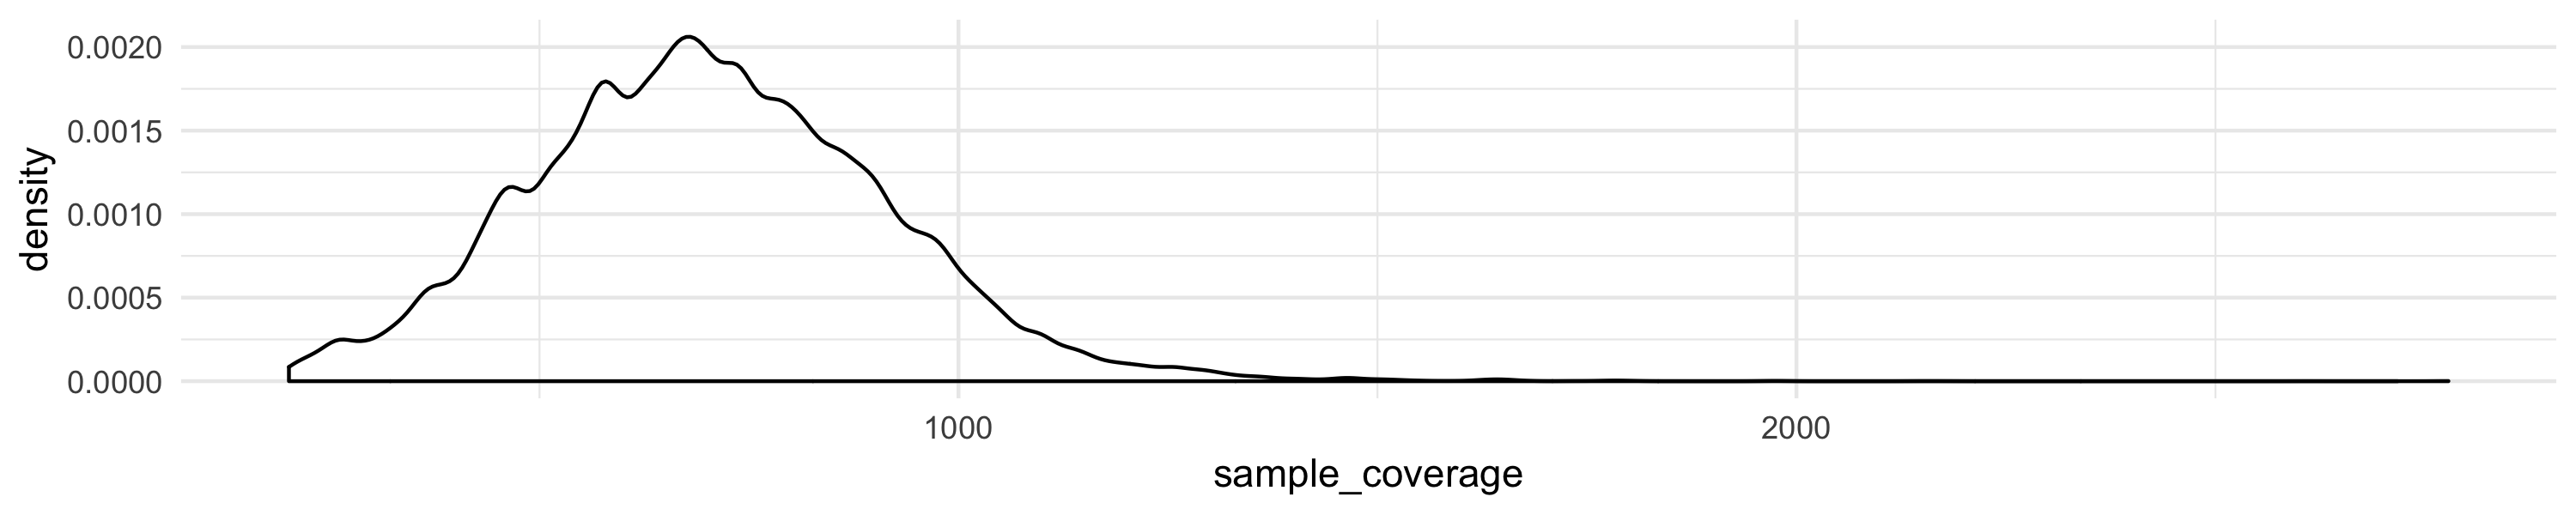

In [15]:
plot_density(impact, "sample_coverage", height = 2)

# ID features

## `mut_key`

The `mut_key` feature (mutation key) identifies unique mutations, and will be thoroughly used in the rest of the study. The mutation key is defined as `Chromosome` _ `Start_Position` _ `Reference_Allele` _ `Tumor_Seq_Allele2`.

In [16]:
length(unique(impact$mut_key))
head(impact$mut_key)

[1] 150041

[1] "17_7577515_T_G"  "1_46521514_G_C"  "3_142178126_C_A" "4_55139732_T_A" 
[5] "4_153249542_C_A" "4_153332775_C_A"

## `Tumor_Sample_Barcode`

In [17]:
length(unique(impact$Tumor_Sample_Barcode))
head(impact$Tumor_Sample_Barcode)

[1] 26133

[1] "P-0000012-T02-IM3" "P-0000012-T03-IM3" "P-0000012-T03-IM3"
[4] "P-0000012-T03-IM3" "P-0000012-T03-IM3" "P-0000012-T03-IM3"

We construct a dataframe giving the number of mutations per sample:

In [18]:
tumor_summary <- get_table(impact$Tumor_Sample_Barcode, sum = FALSE)
summary(tumor_summary$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   8.611   8.000 618.000 

So we have a mean of 11 called mutations per tumor sample, among **26,143 tumor sample**. The distribution of mutations is really tight (see under), with a few outliers having a high mutational burden. Indeed, 165 samples presented more than a 100 mutations (e.g. $165/26,143\approx0.6\%$ of the sample), but only 2 samples presented more than 500 mutations.

[1] 165

[1] 2

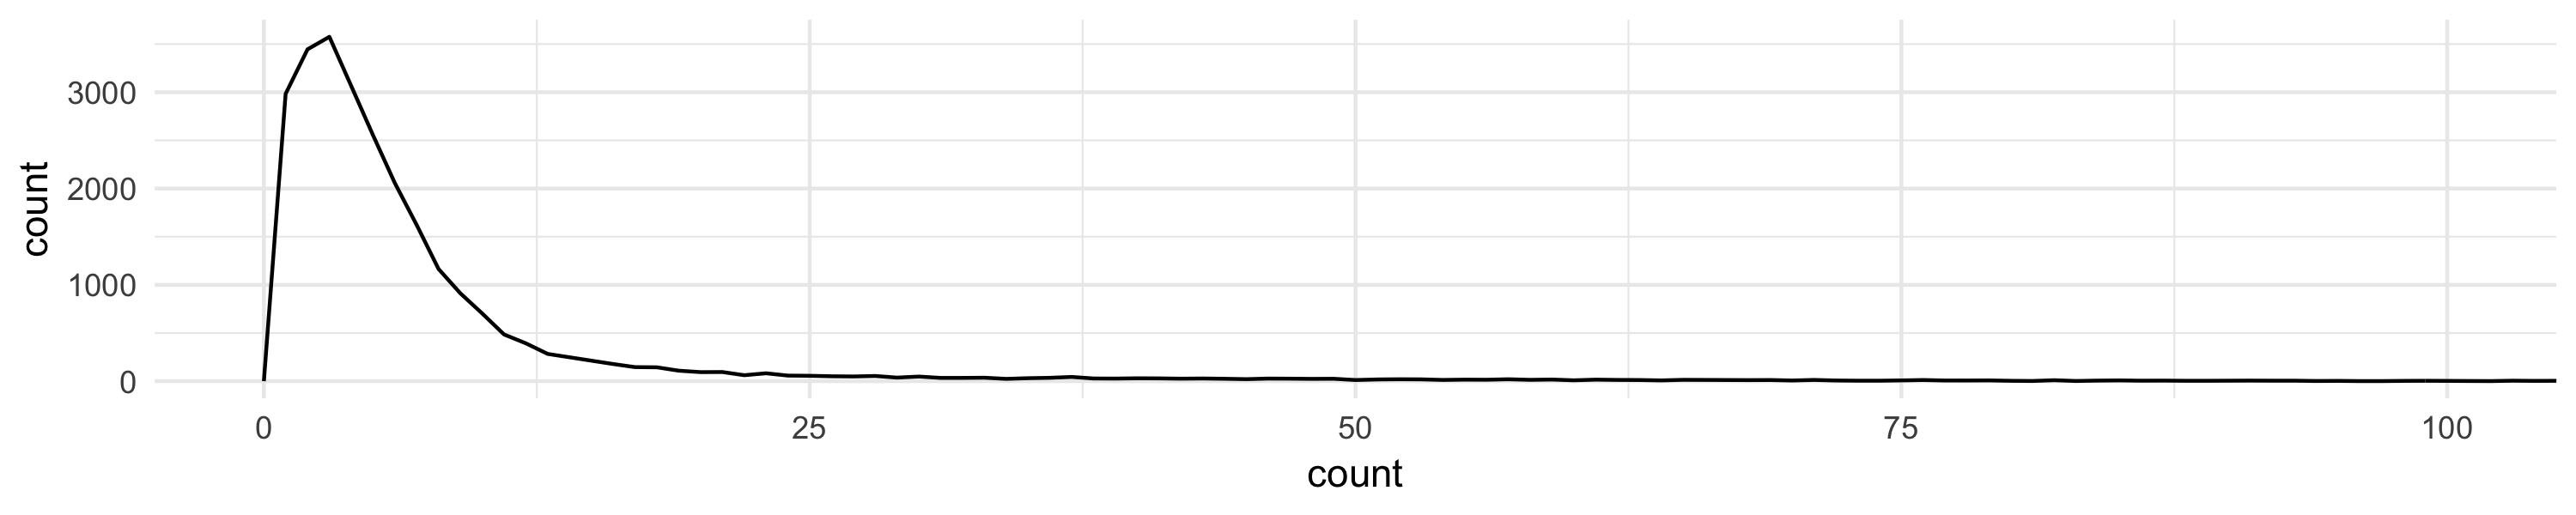

In [19]:
nrow(tumor_summary[tumor_summary$count >= 100,])
nrow(tumor_summary[tumor_summary$count >= 500,])
set_notebook_plot_size(10, 2)
ggplot(tumor_summary) + geom_freqpoly(aes(count), binwidth = 1) + coord_cartesian(xlim = c(0, 100))

## `sample_mut_key`

The `sample_mut_key` feature (sample mutation key) identifies unique rows in the dataset, and will be thoroughly used in the rest of the study. The sample mutation key is defined as `Tumor_Sample_Barcode`_`mut_key`.

In [20]:
length(unique(impact$sample_mut_key))
head(impact$sample_mut_key)

[1] 225022

[1] "P-0000012-T02-IM3_17_7577515_T_G"  "P-0000012-T03-IM3_1_46521514_G_C" 
[3] "P-0000012-T03-IM3_3_142178126_C_A" "P-0000012-T03-IM3_4_55139732_T_A" 
[5] "P-0000012-T03-IM3_4_153249542_C_A" "P-0000012-T03-IM3_4_153332775_C_A"

## `patient_key`

Each patient is identified by extracting the 'P-0000012' part of the tumor barcodes, we have **24,016 patients**:

In [21]:
length(unique(impact$patient_key))
head(impact$patient_key)

[1] 24008

[1] "P-0000012" "P-0000012" "P-0000012" "P-0000012" "P-0000012" "P-0000012"

⚠️ Only one barcode doesn't respect this convention, `None-T01-IM6` with 6 mutations.

In [22]:
# find the not-matching patterns
unique(impact$Tumor_Sample_Barcode[grep("P-", impact$Tumor_Sample_Barcode, invert = TRUE)])

[1] "None-T01-IM6"

In [23]:
impact[impact$Tumor_Sample_Barcode == "None-T01-IM6",][c("Tumor_Sample_Barcode",
                                                         "Hugo_Symbol",
                                                         "Consequence",
                                                         "Variant_Type",
                                                         "confidence_class",
                                                         "patient_key")]

Tumor_Sample_Barcode Hugo_Symbol    Consequence       Variant_Type
152379 None-T01-IM6         TP53           nonsynonymous_SNV SNP         
152380 None-T01-IM6         ERBB2          nonsynonymous_SNV SNP         
152381 None-T01-IM6         SMAD4          nonsynonymous_SNV SNP         
152382 None-T01-IM6         CDKN2Ap16INK4A nonsynonymous_SNV SNP         
152383 None-T01-IM6         CREBBP         nonsynonymous_SNV SNP         
152384 None-T01-IM6         TGFBR2         stopgain_SNV      SNP         
       confidence_class patient_key
152379 AUTO_OK          None-T01-  
152380 MANUAL_OK        None-T01-  
152381 AUTO_OK          None-T01-  
152382 AUTO_OK          None-T01-  
152383 AUTO_OK          None-T01-  
152384 AUTO_OK          None-T01-

# Consequence features

## `VEP_Consequence`

values                  count  freq 
1  missense_variant        161069 71.6%
2  frameshift_variant       28249 12.6%
3  stop_gained              21412 9.5% 
4  splice_acceptor_variant   4447 2%   
5  inframe_deletion          4397 2%   
6  splice_donor_variant      3897 1.7% 
7  inframe_insertion          905 0.4% 
8  start_lost                 409 0.2% 
9  stop_lost                  237 0.1% 
10 -- total --             225022 100%

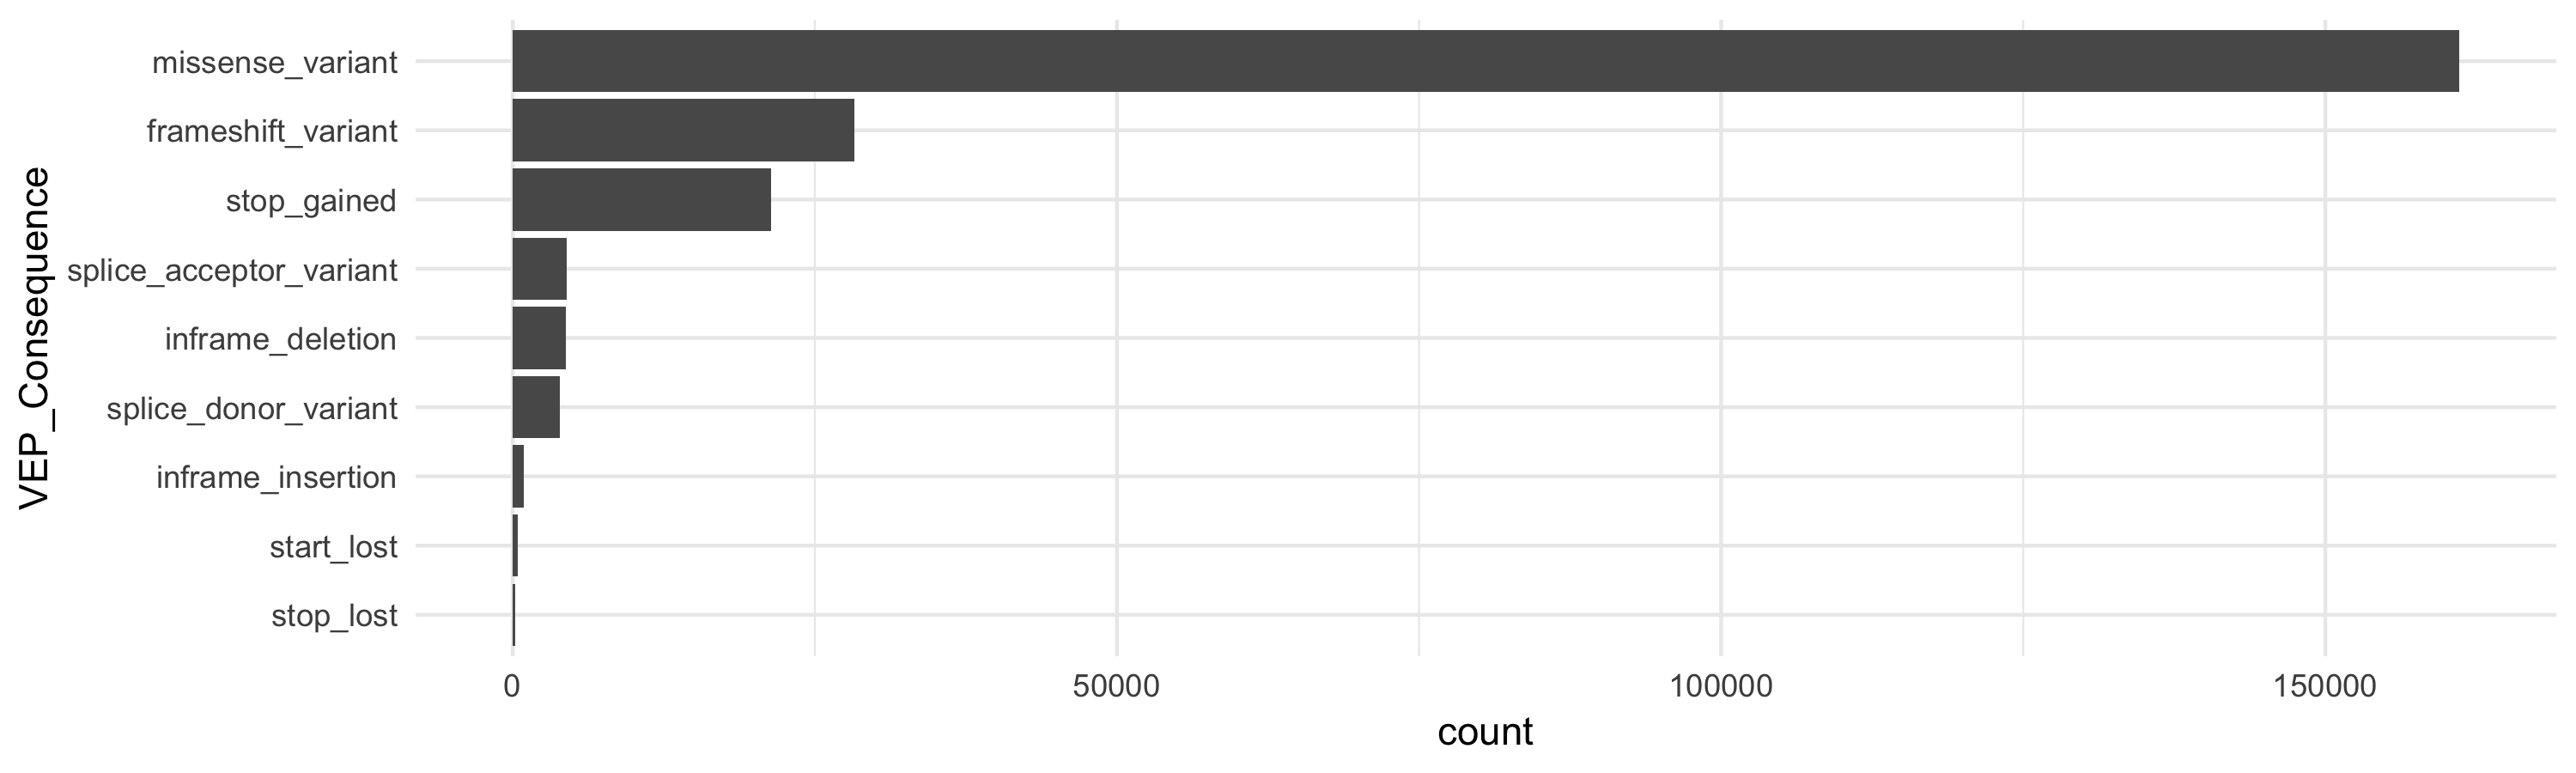

In [24]:
get_table(impact$VEP_Consequence)
plot_histogram(impact, "VEP_Consequence", flip = TRUE)

## `VEP_IMPACT`, `VEP_CLIN_SIG`

In [25]:
get_table(impact$VEP_IMPACT)

values      count  freq 
1 MODERATE    166371 73.9%
2 HIGH         58651 26.1%
3 -- total -- 225022 100%

## `VEP_CLIN_SIG`

In [26]:
get_table(impact$VEP_CLIN_SIG)

values      count  freq 
1 unknown     196315 87.2%
2 pathogenic   27907 12.4%
3 benign         800 0.4% 
4 -- total -- 225022 100%

## Sift and PolyPhen

In [27]:
get_table(impact$VEP_SIFT_class)

values                     count  freq 
1 deleterious                 93161 41.4%
2 unknown                     65545 29.1%
3 tolerated                   49776 22.1%
4 deleterious_low_confidence   9449 4.2% 
5 tolerated_low_confidence     7091 3.2% 
6 -- total --                225022 100%

In [28]:
get_table(impact$VEP_PolyPhen_class)

values            count  freq 
1 probably_damaging  70121 31.2%
2 unknown            64634 28.7%
3 benign             62495 27.8%
4 possibly_damaging  27772 12.3%
5 -- total --       225022 100%

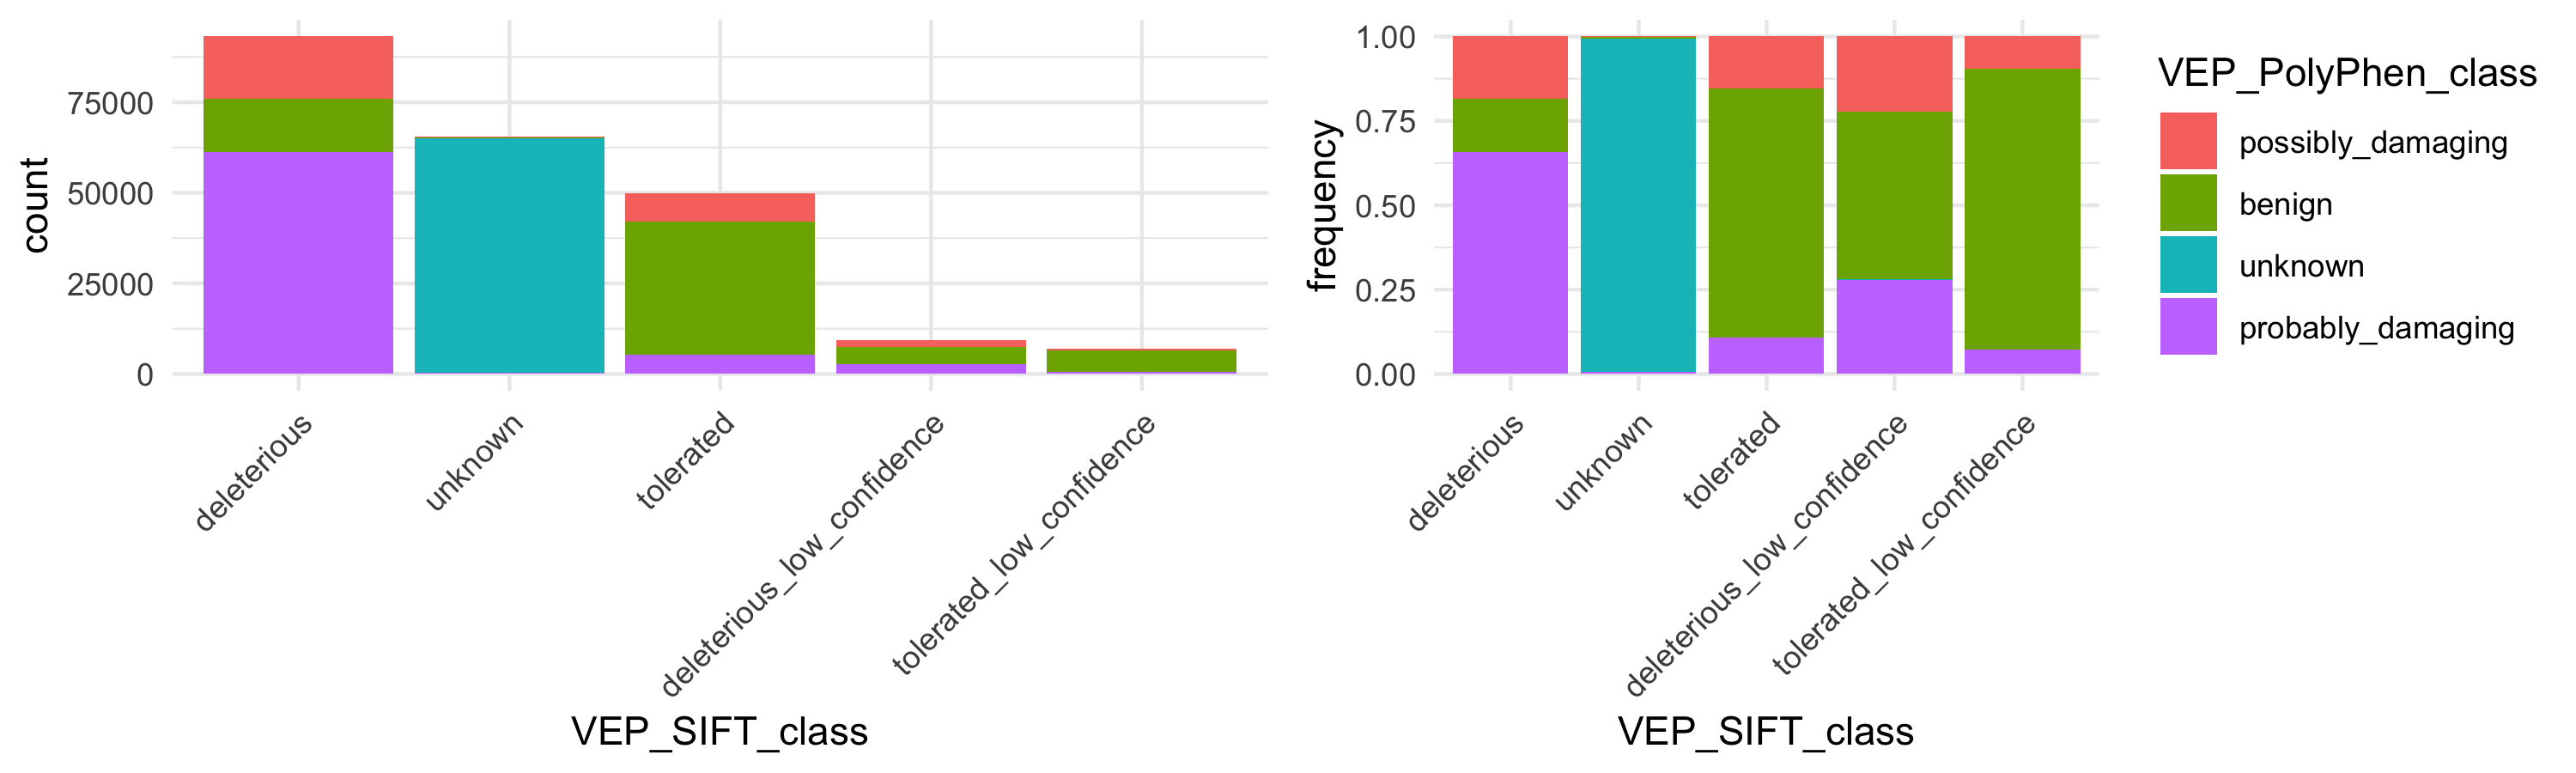

In [29]:
plot_contingency_table_as_histograms(impact, "VEP_SIFT_class", "VEP_PolyPhen_class")

In [30]:
impact_temp <- impact[impact$VEP_SIFT_class != "unknown" & impact$VEP_PolyPhen_class != "unknown",]

Warning sqrt y scale:

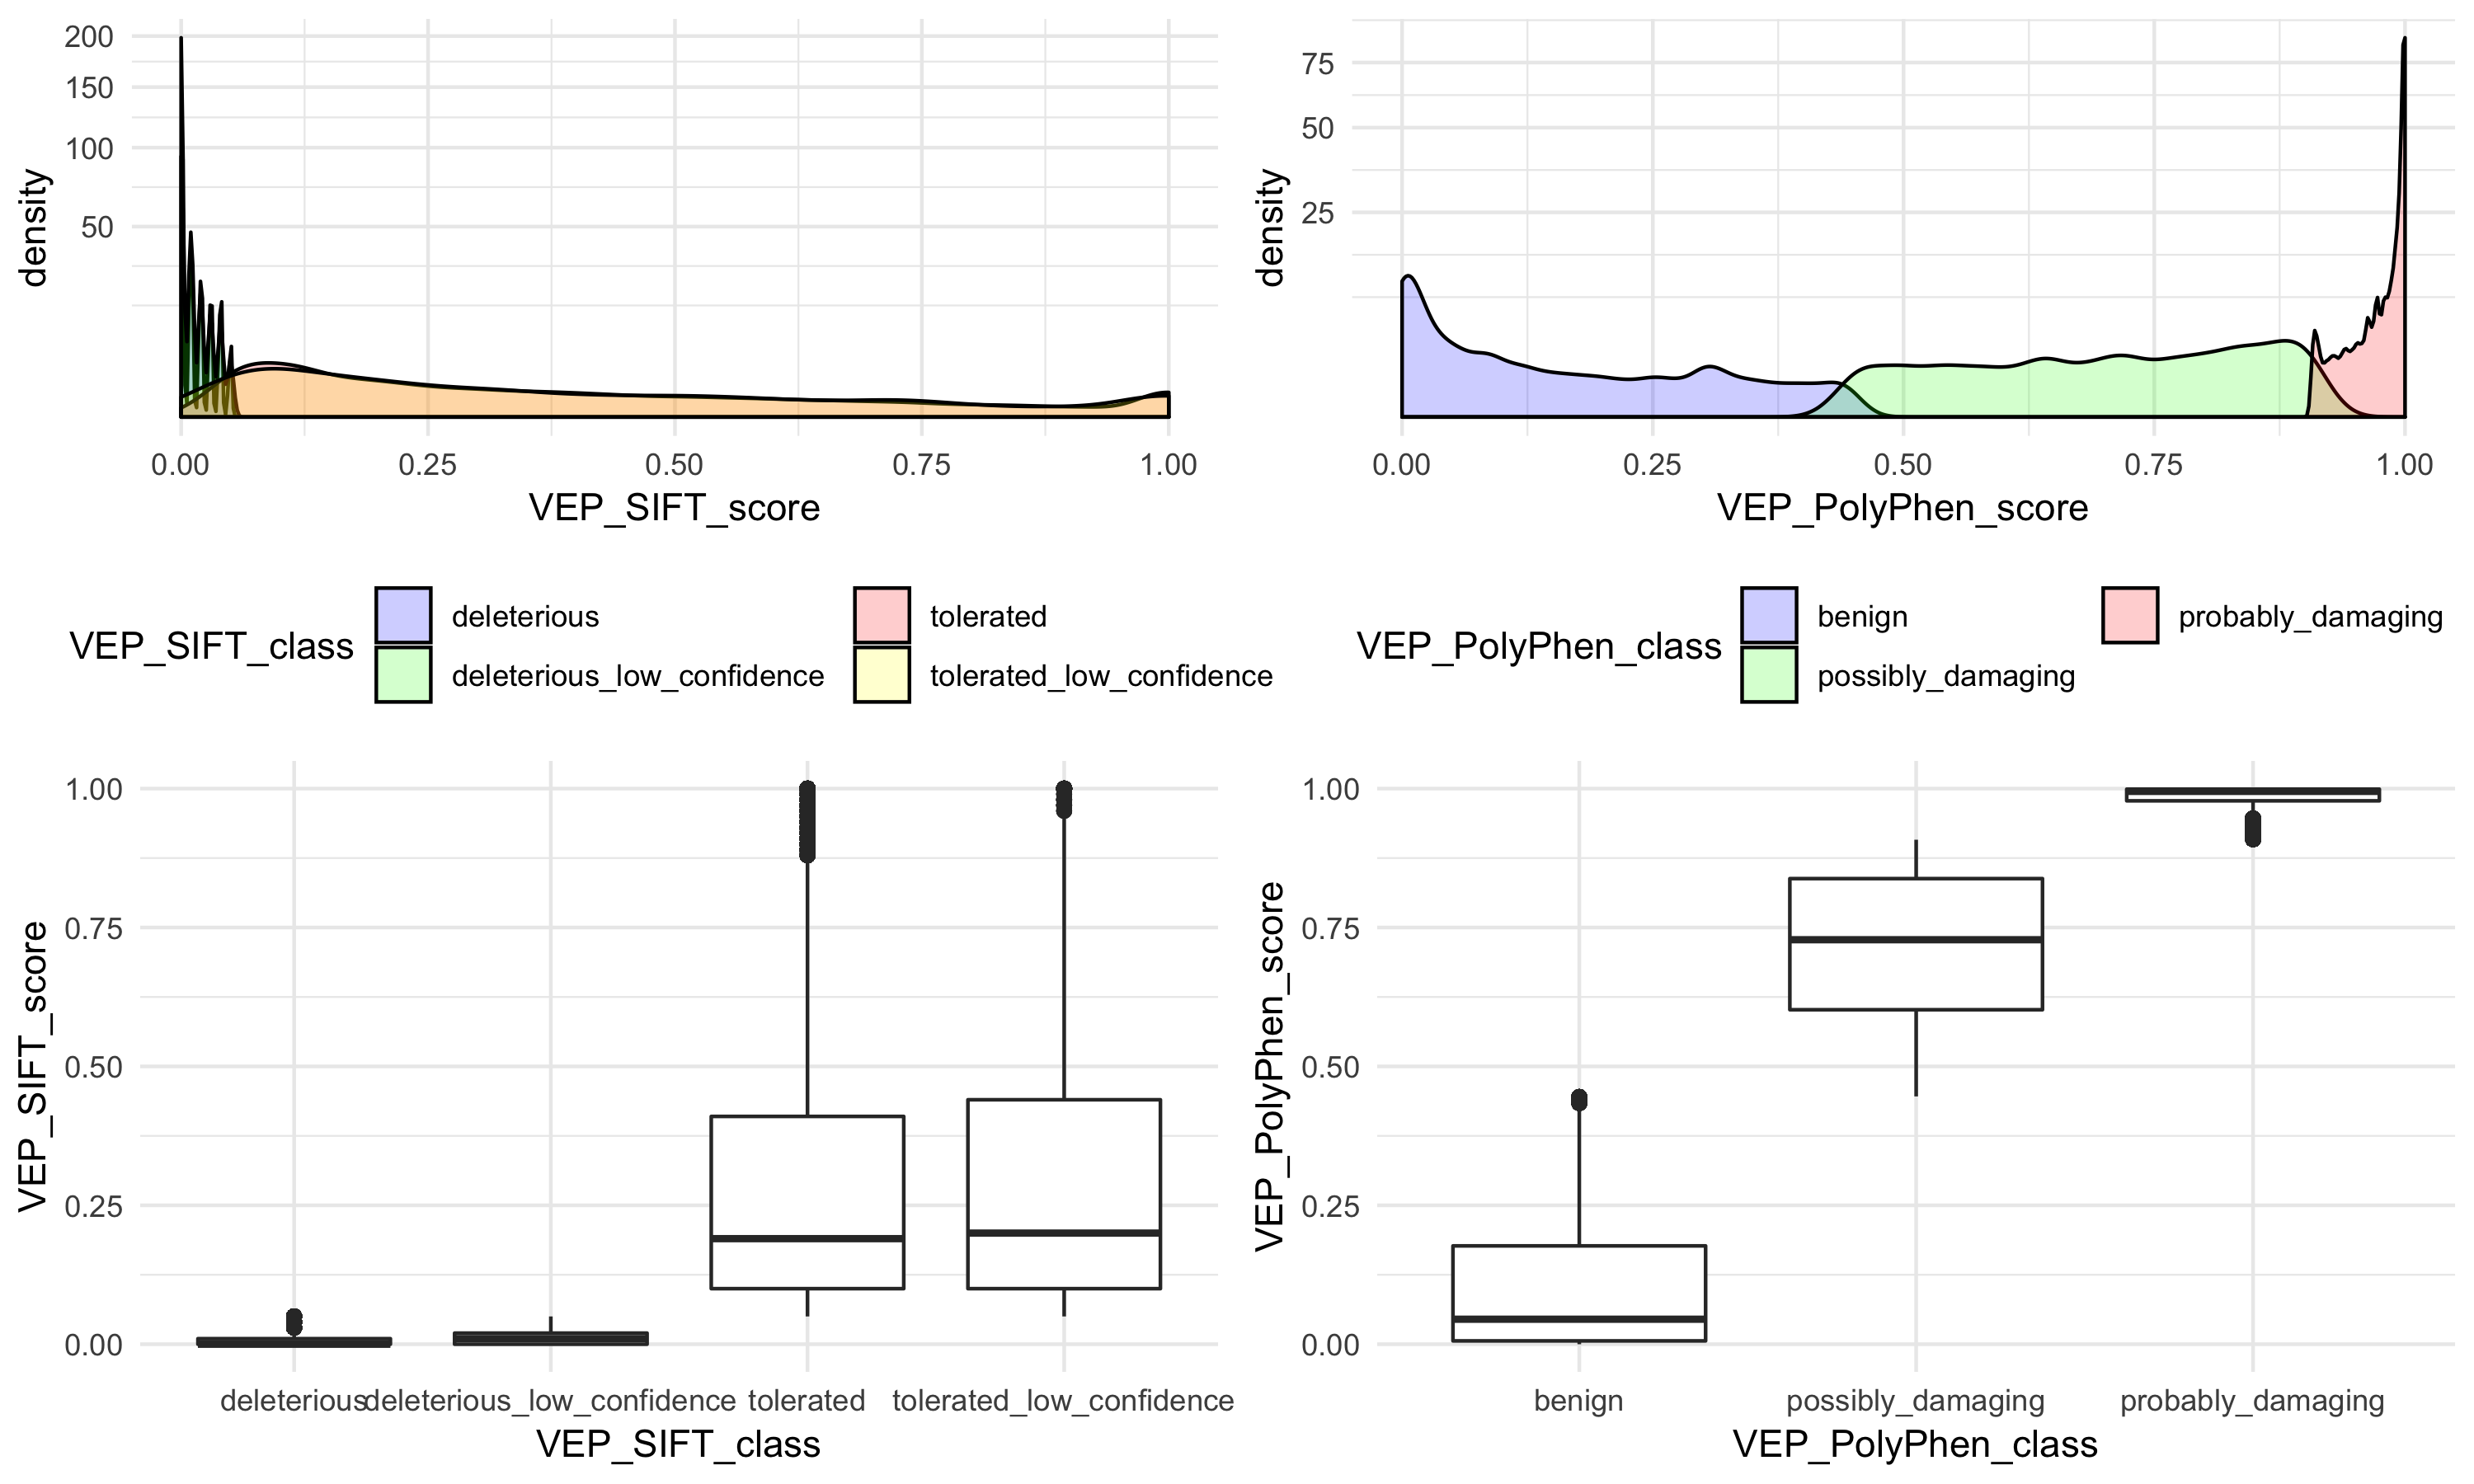

In [31]:
plot1 <- plot_density(impact_temp, "VEP_SIFT_score", fill = "VEP_SIFT_class") +
             theme(legend.position="bottom") +
             guides(fill = guide_legend(ncol = 2)) +
             scale_y_sqrt()
plot2 <- plot_density(impact_temp, "VEP_PolyPhen_score", fill = "VEP_PolyPhen_class") +
             theme(legend.position="bottom") +
             guides(fill = guide_legend(ncol = 2)) +
             scale_y_sqrt()
plot3 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_SIFT_class, VEP_SIFT_score))
plot4 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_PolyPhen_class, VEP_PolyPhen_score))
set_notebook_plot_size(10, 6)
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

In [32]:
impact_temp$VEP_PolyPhen_score <- 1 - impact_temp$VEP_PolyPhen_score

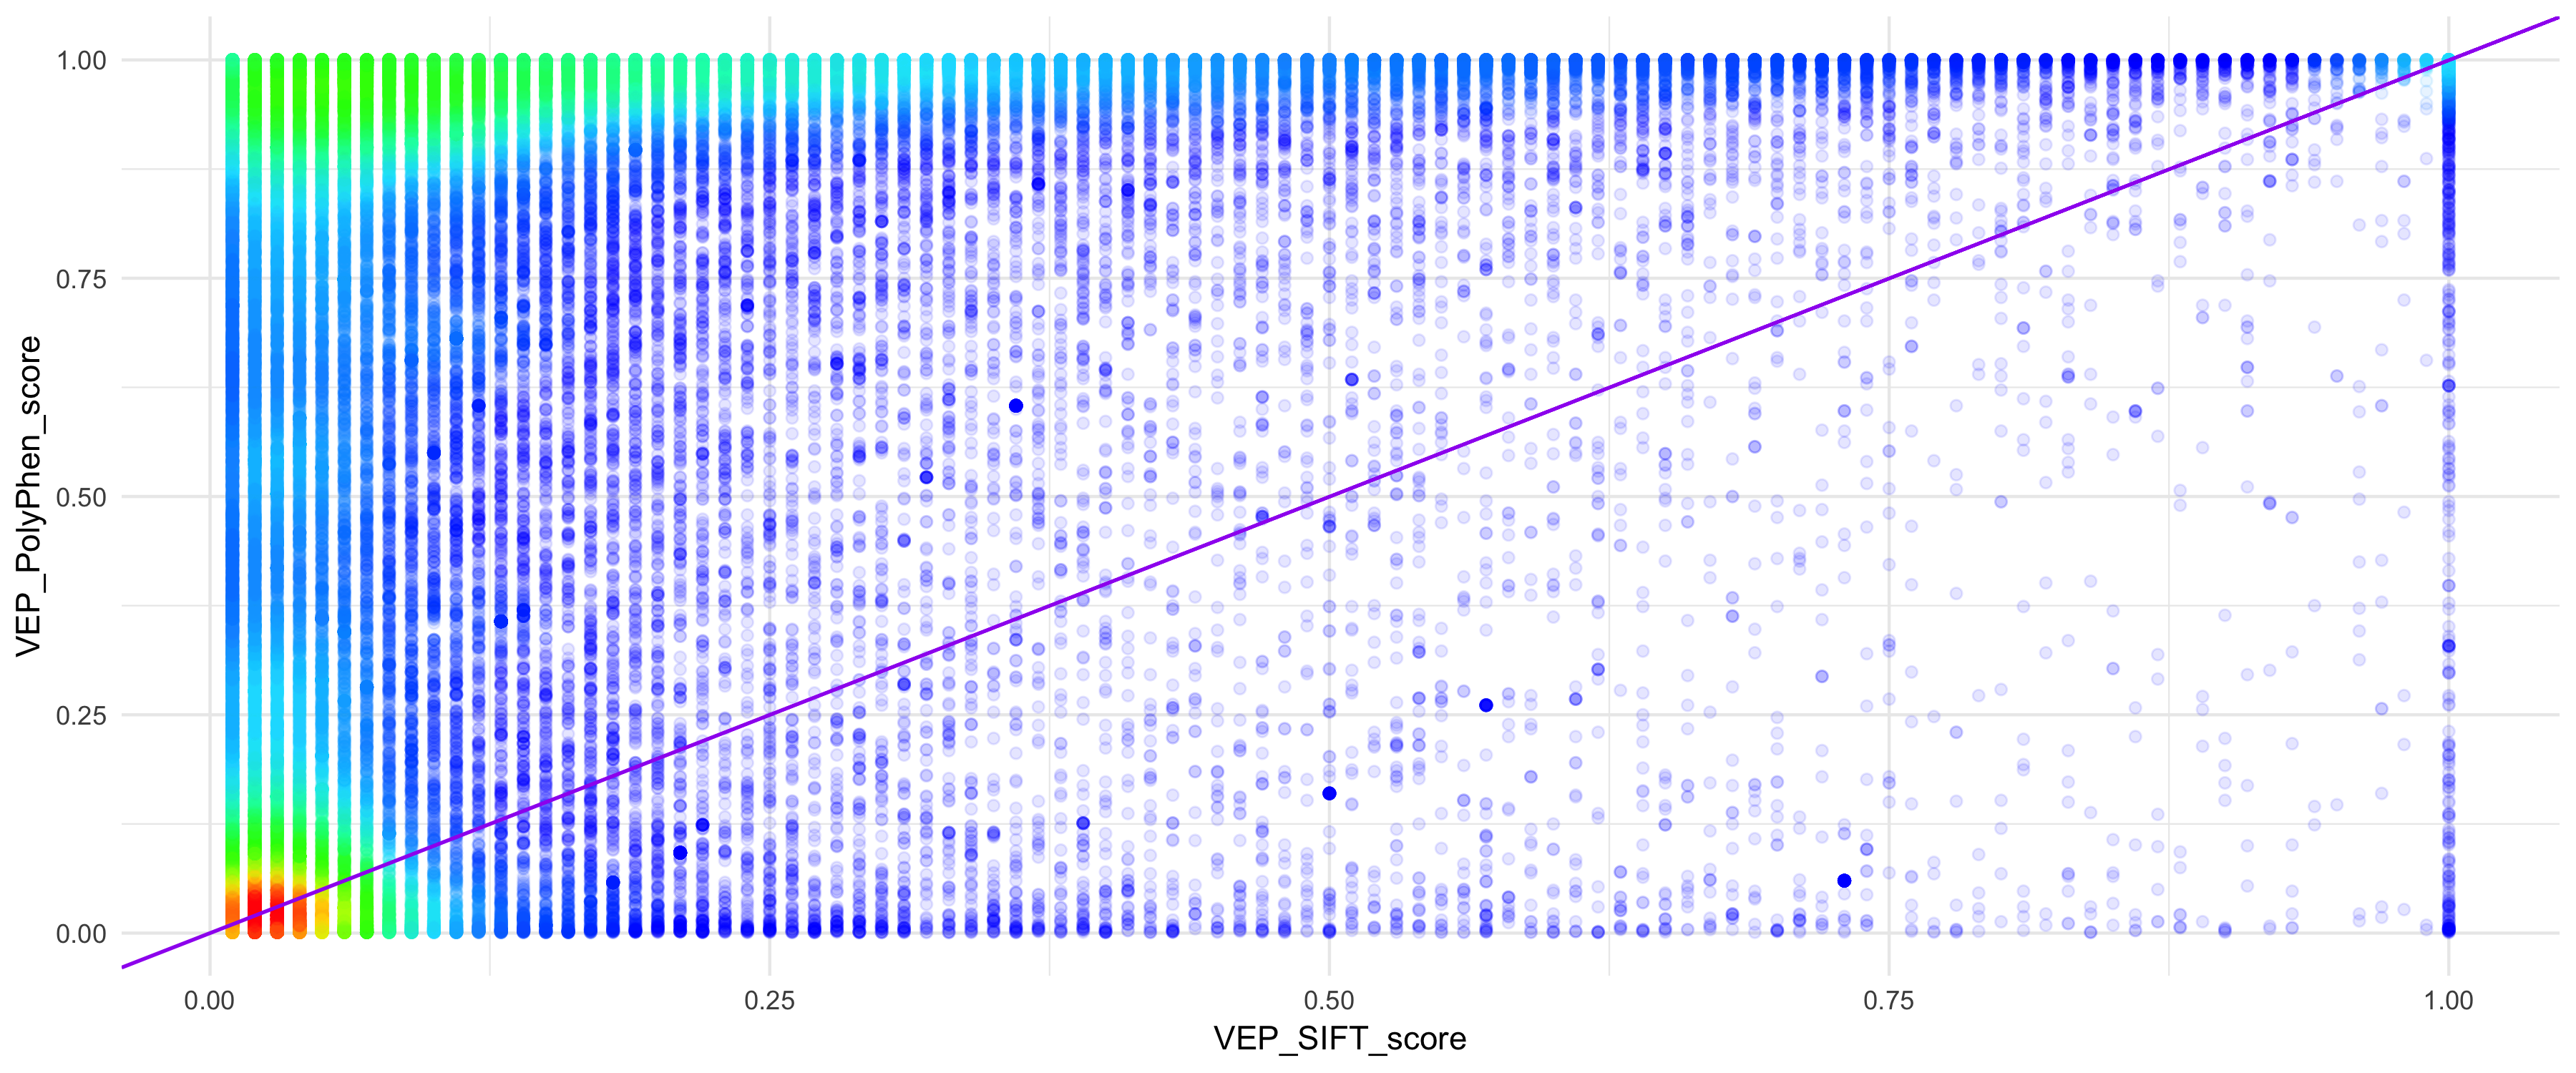

In [33]:
plot_density_2d(impact_temp[impact_temp$VEP_SIFT_score & impact_temp$VEP_PolyPhen_score ,],
                "VEP_SIFT_score", "VEP_PolyPhen_score", points_only = TRUE, height = 5) + geom_abline(intercept = 0, slope = 1, color = "purple", size = 0.6)

## `VEP_COSMIC`

In [34]:
summary(impact$VEP_COSMIC_CNT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   318.8     2.0 41311.0 

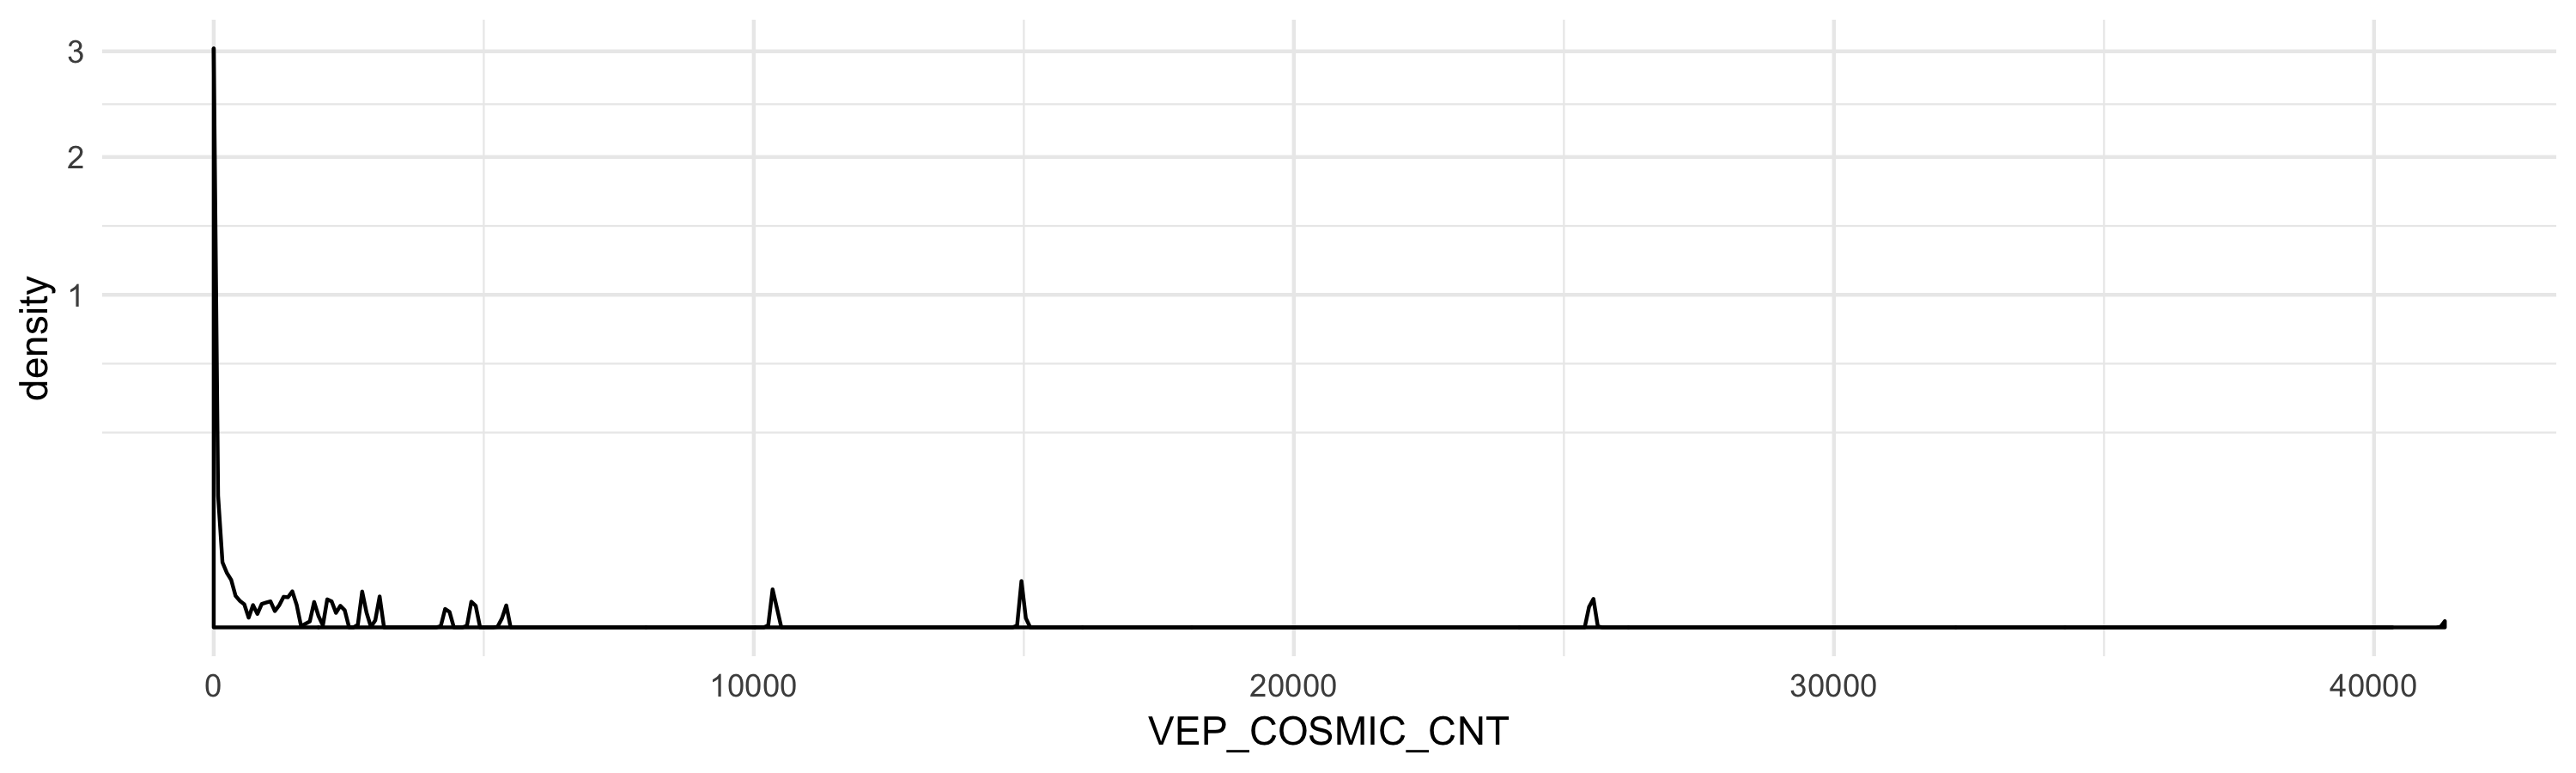

In [35]:
plot_density(impact, "VEP_COSMIC_CNT") + scale_y_sqrt()

# Other features

## VEP AF annotations

In [36]:
get_table(impact$VEP_in_dbSNP)

values      count  freq 
1 FALSE       162414 72.2%
2 TRUE         62608 27.8%
3 -- total -- 225022 100%

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

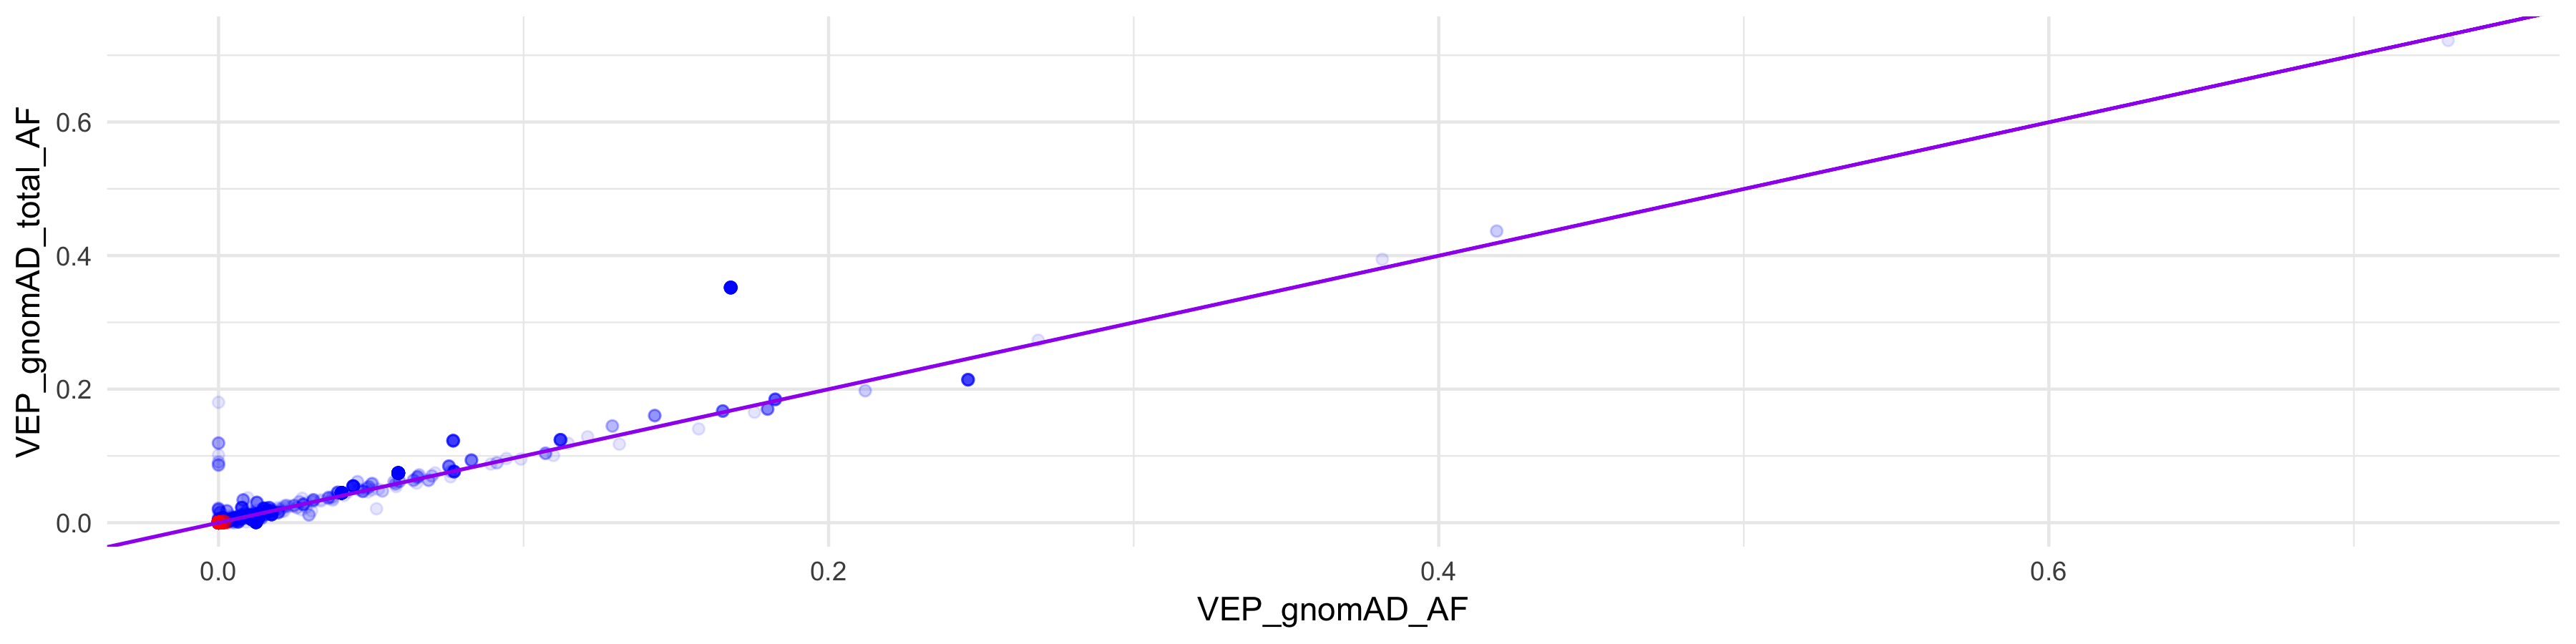

In [37]:
plot_density_2d(impact, "VEP_gnomAD_AF", "VEP_gnomAD_total_AF", points_only = TRUE, height = 3) +
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

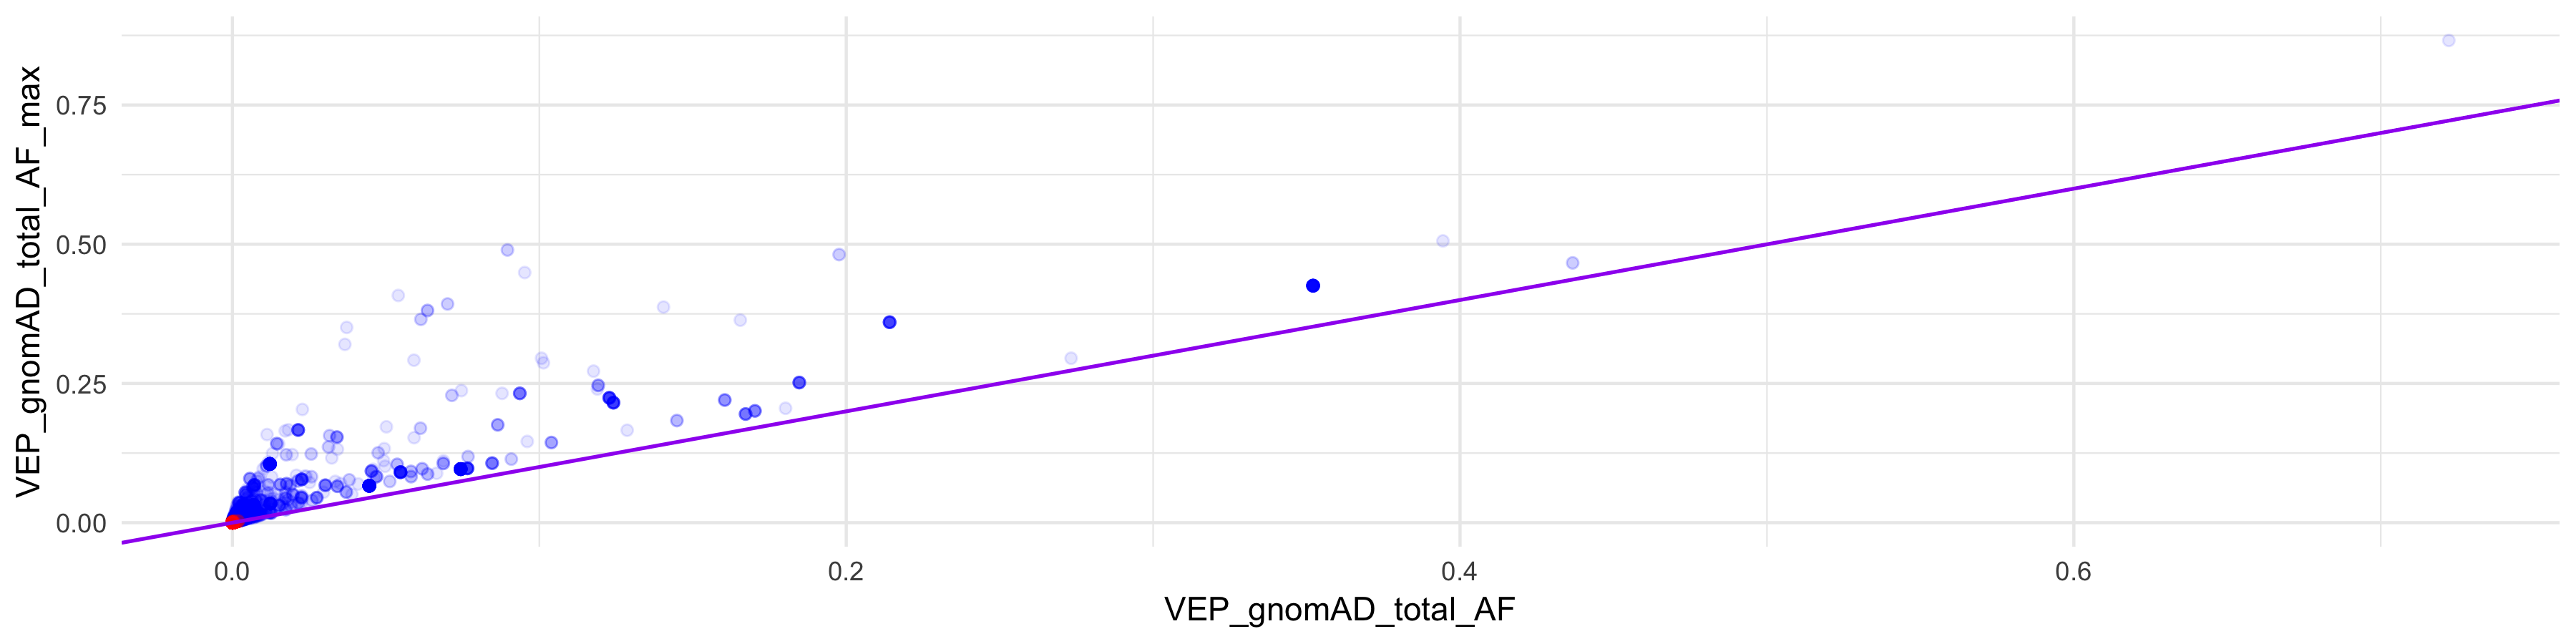

In [38]:
plot_density_2d(impact, "VEP_gnomAD_total_AF", "VEP_gnomAD_total_AF_max", points_only = TRUE, height = 3) +
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

## `confidence_class`

This features takes three values:
* `AUTO_OK` : every variant that enter the database is assign this label.
* `UNLIKELY` : a curator manually switch the confidence from `AUTO_OK` to unlikely, ie to drop.
* `MANUAL_OK` : a curator has been changing his mind ie auto ok -> drop -> ok.

values      count  freq 
1 AUTO_OK     210446 93.5%
2 MANUAL_OK     7727 3.4% 
3 UNLIKELY      6849 3%   
4 -- total -- 225022 100%

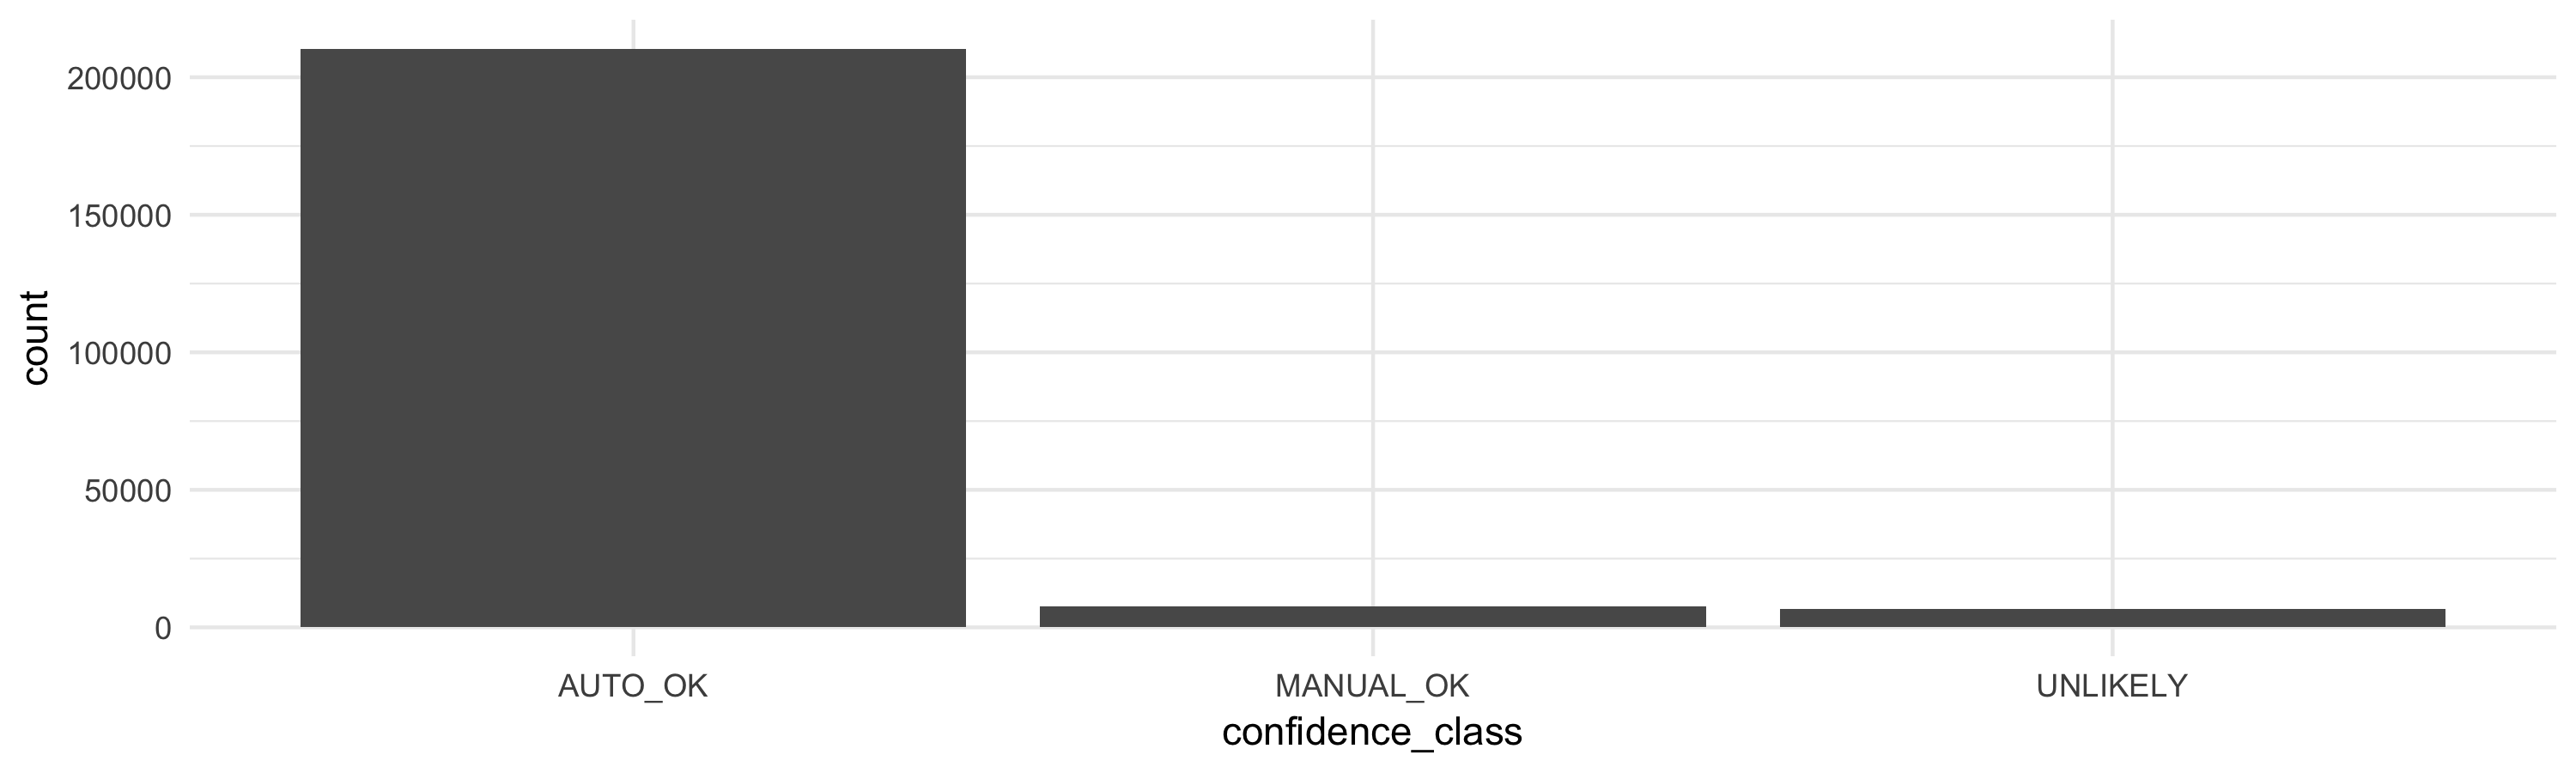

In [39]:
get_table(impact$confidence_class)
plot_histogram(impact, "confidence_class")

## `frequency_in_normals`

In [40]:
get_table(impact$frequency_in_normals != 0)
summary(impact$frequency_in_normals[impact$frequency_in_normals != 0])

values      count  freq 
1 FALSE       220695 98.1%
2 TRUE          4327 1.9% 
3 -- total -- 225022 100%

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02100 0.02600 0.04400 0.06776 0.10300 0.19600 

Overall the frequency of the apparition in normal samples is amost always null, except for a few rows (4335). For these last 4335 rows, the values are quite low ($\leq0.2$):

Distribution of `frequency_in_normals` (warning this plot concerns only the non-null `frequency_in_normals` ie 1.9% of the data):

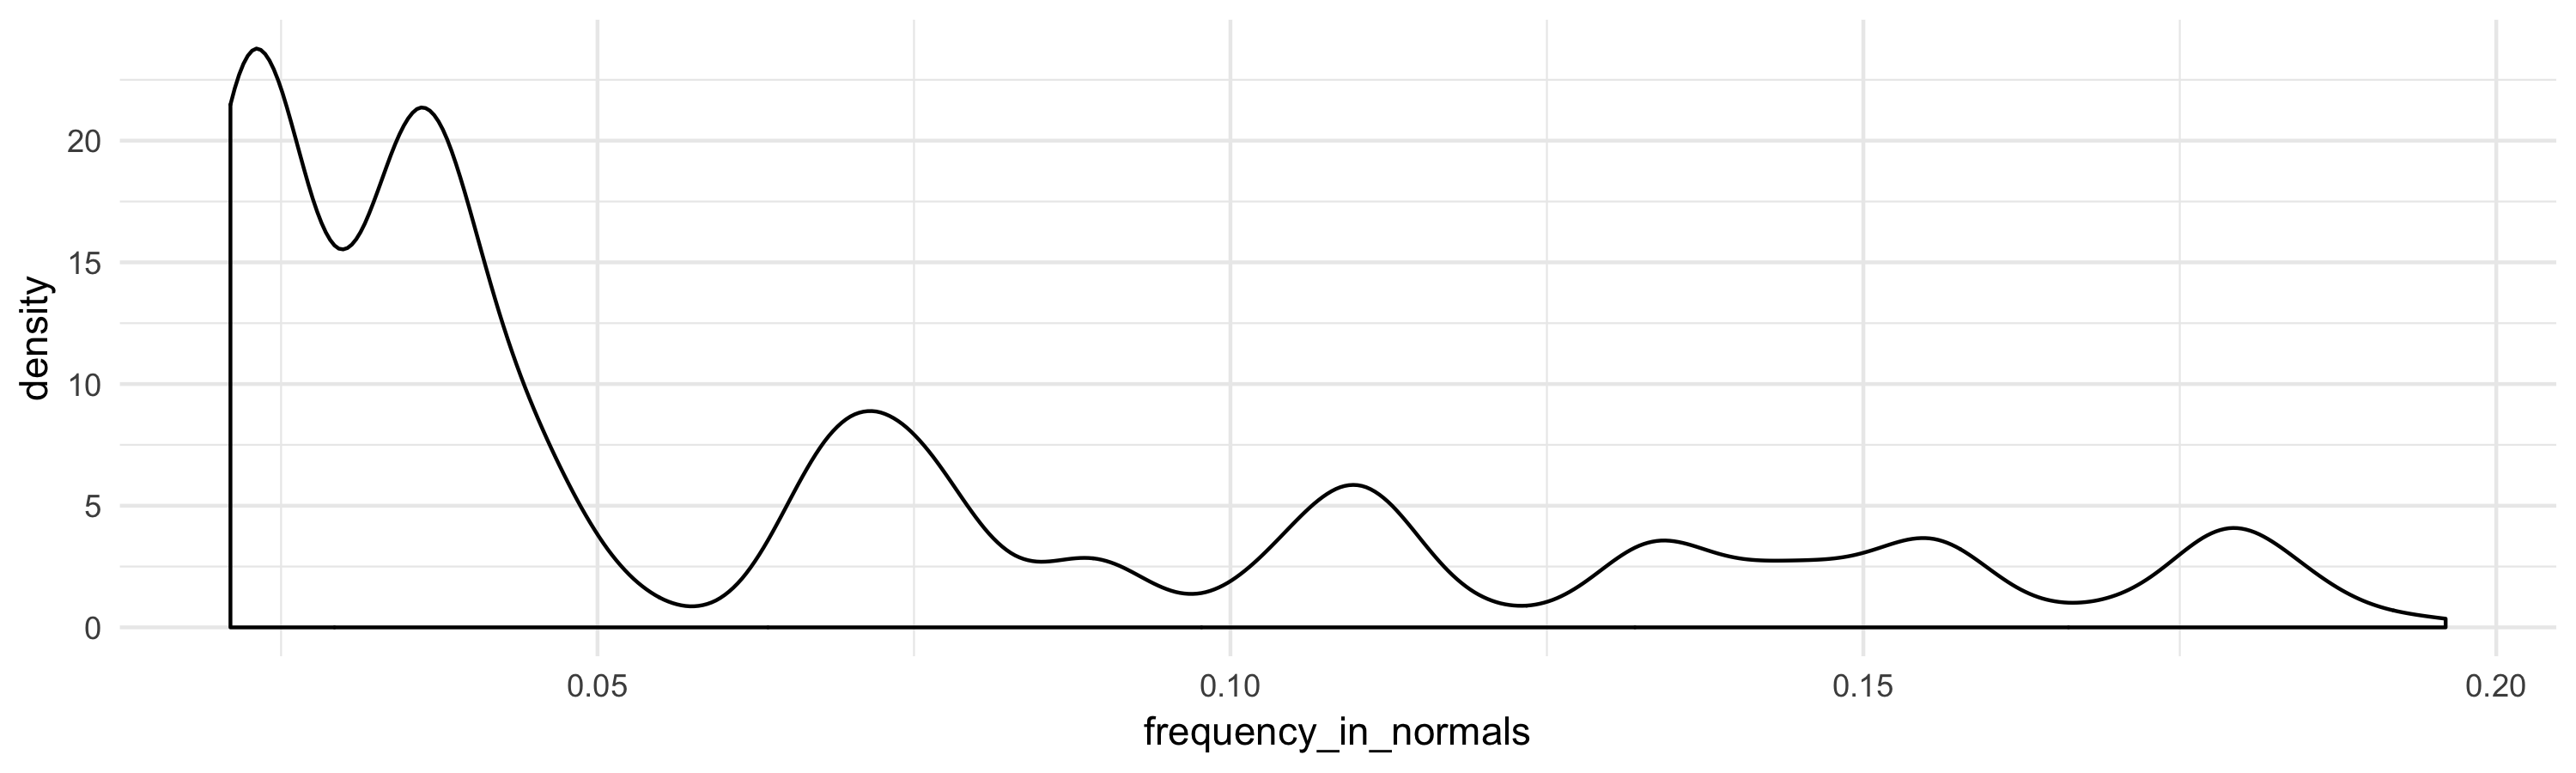

In [41]:
plot_density(impact[impact$frequency_in_normals != 0,], "frequency_in_normals", adjust = 0.5)

## `variant_caller_cv`

⚠️ It is unclear what this means (no mutation called only by MUTECT ?!).

values               count  freq 
1  MUTECT_VARDICT       117646 52.3%
2  MUTECT_ANNOVAR        67761 30.1%
3  SID_VARDICT           21065 9.4% 
4  SOMATICINDEL_ANNOVAR  11003 4.9% 
5  VARDICT                4311 1.9% 
6  SID_PINDEL_ANNOVAR     1395 0.6% 
7  SID_PINDEL_VARDICT      789 0.4% 
8  PINDEL_VARDICT          453 0.2% 
9  UNKNOWN                 380 0.2% 
10 PINDEL_ANNOVAR          219 0.1% 
11 -- total --          225022 100%

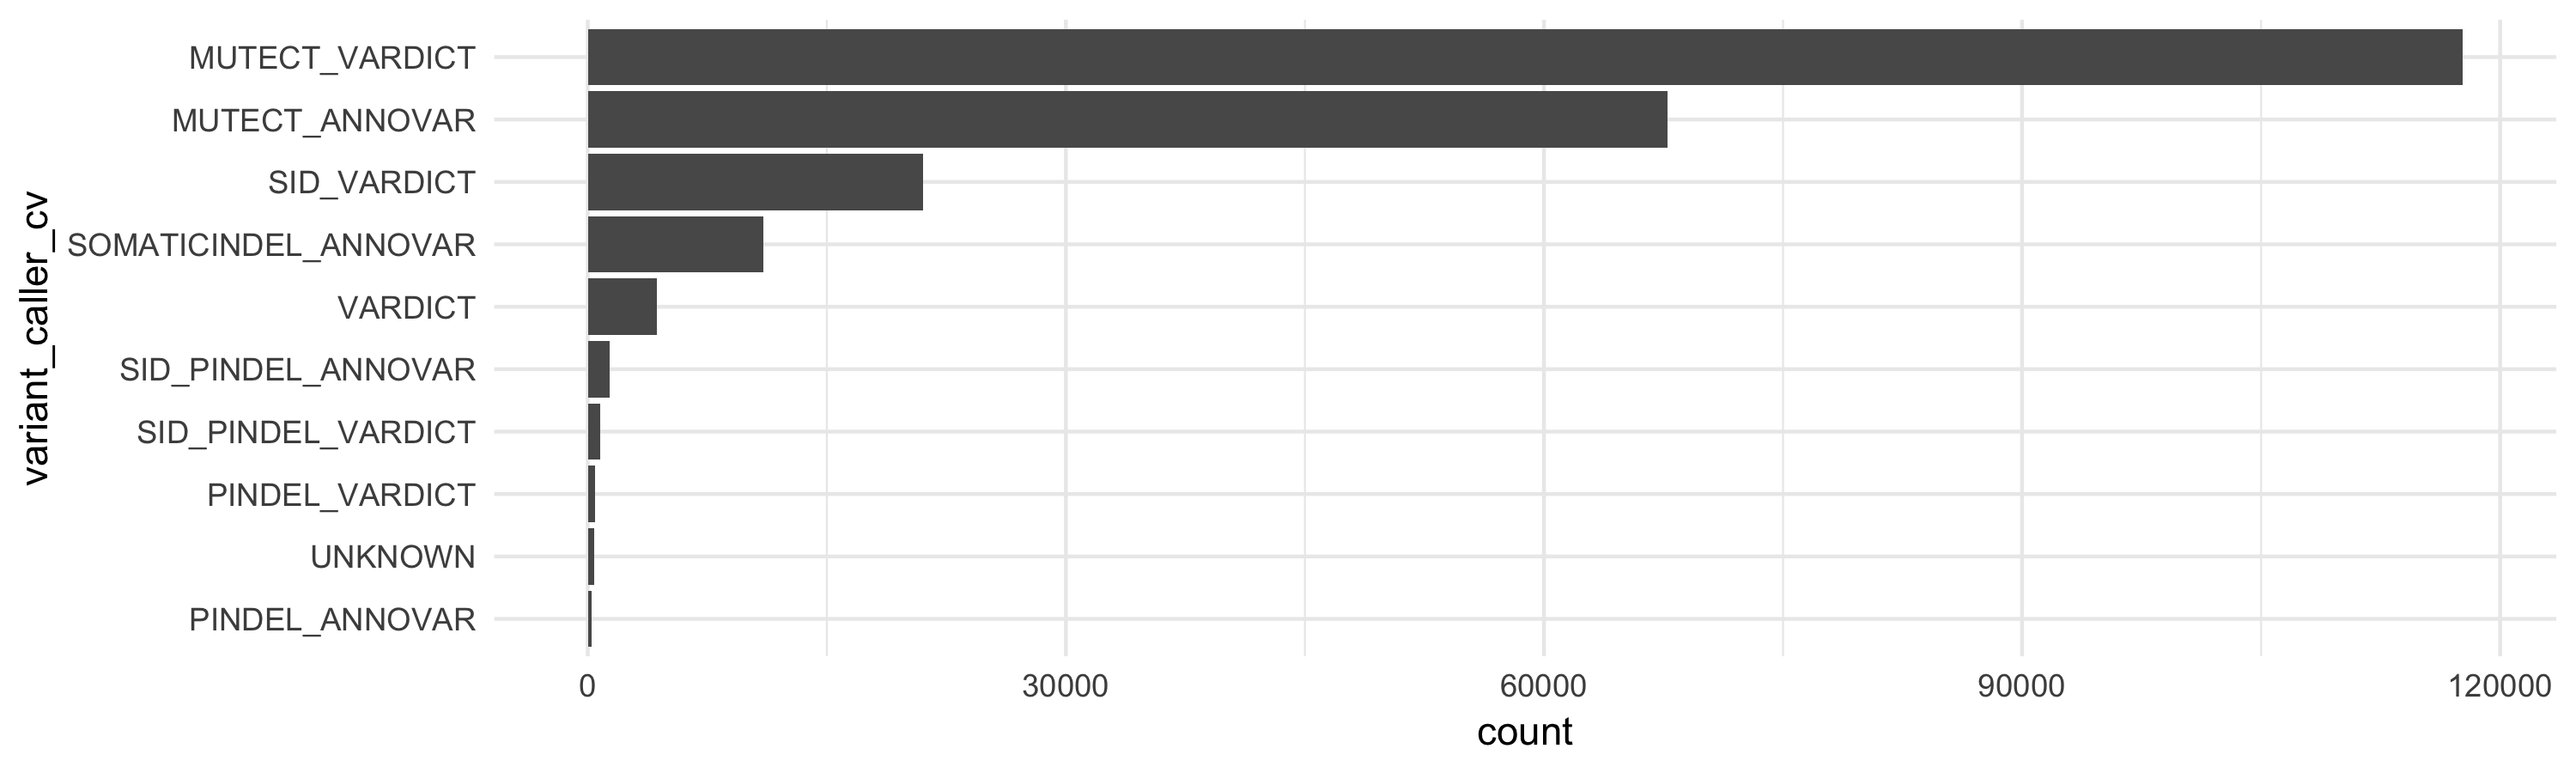

In [42]:
get_table(impact$variant_caller_cv)
plot_histogram(impact, "variant_caller_cv", flip = TRUE)

# Contingency tables

## `VEP_Consequence` vs `confidence_class`

The following plots represent the distribution of the mutations grouped by `VEP_Consequence` over the `confidence_class`. The left plot shows the count over each `confidence_class`, while the right plot shows the frequency over each `confidence_class`.

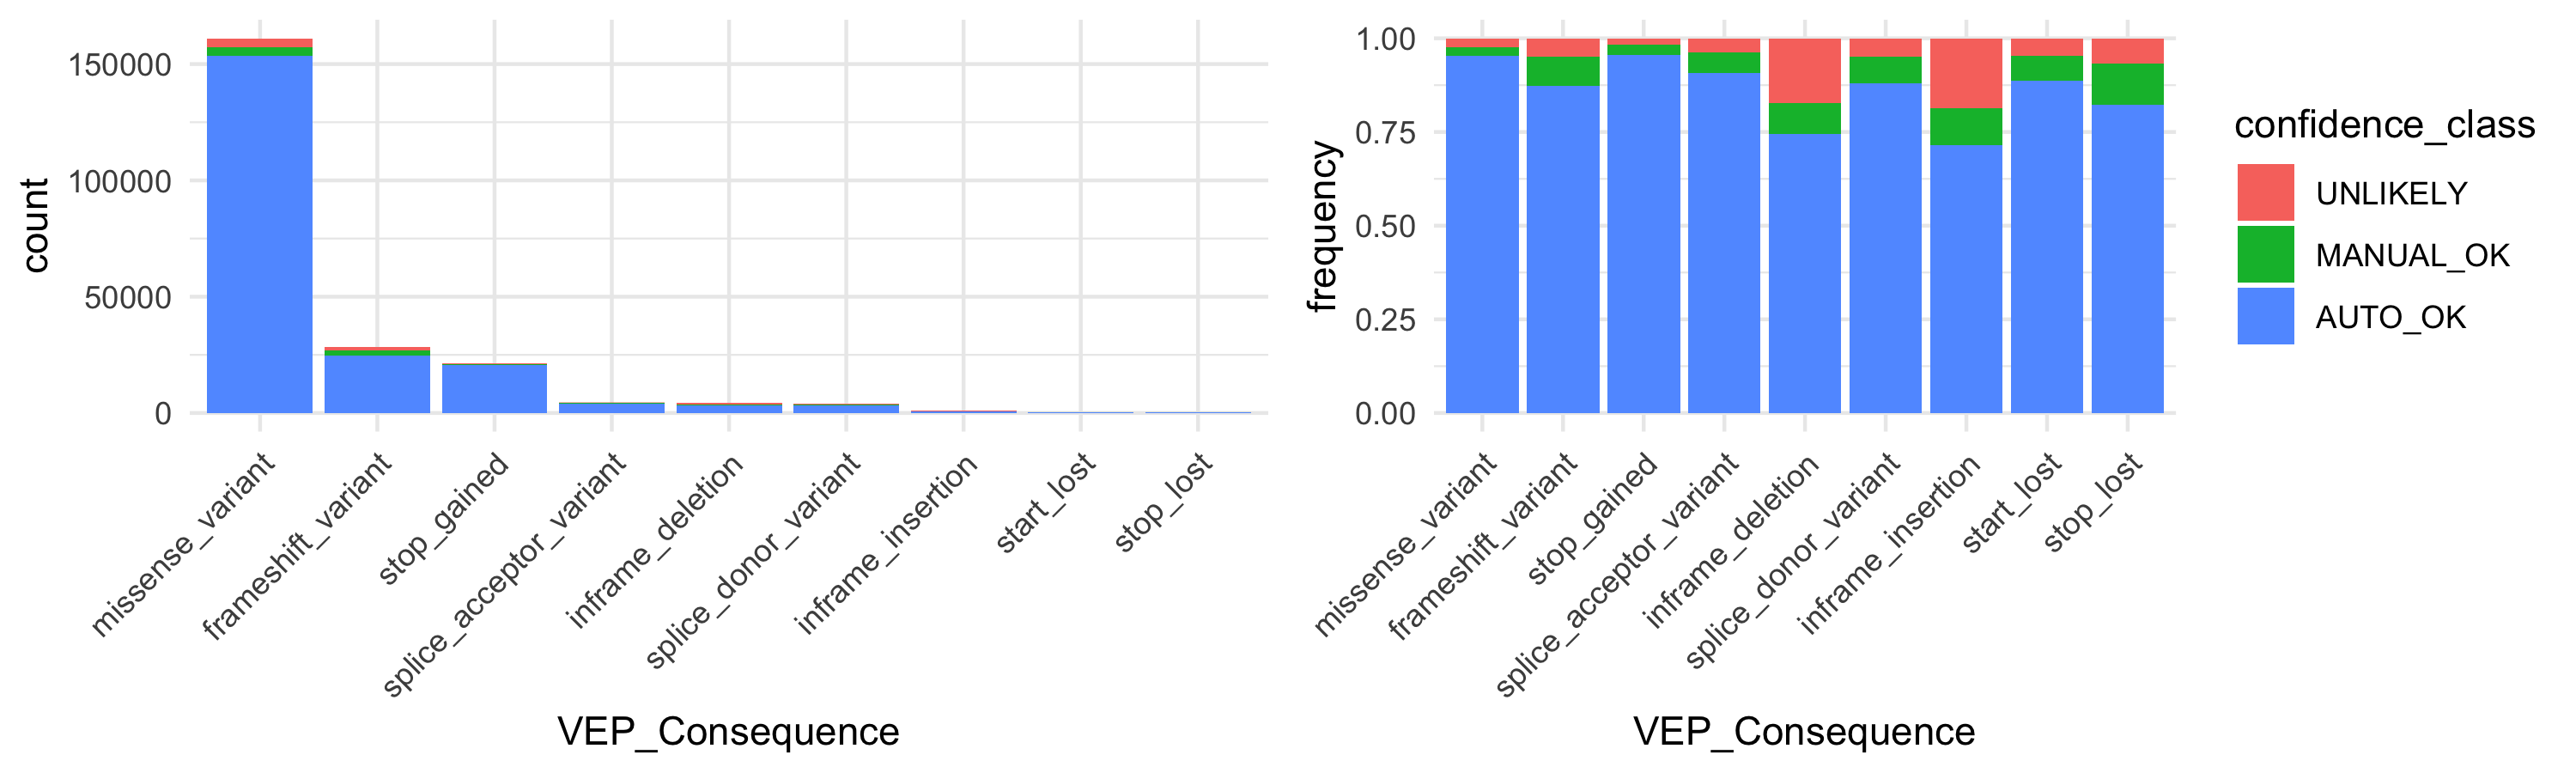

In [43]:
plot_contingency_table_as_histograms(impact, "VEP_Consequence", "confidence_class")

## `VEP_Consequence` vs `VEP_VARIANT_CLASS`

The following plots represent the distribution of the mutations grouped by `VEP_Consequence` over the `VEP_VARIANT_CLASS`:

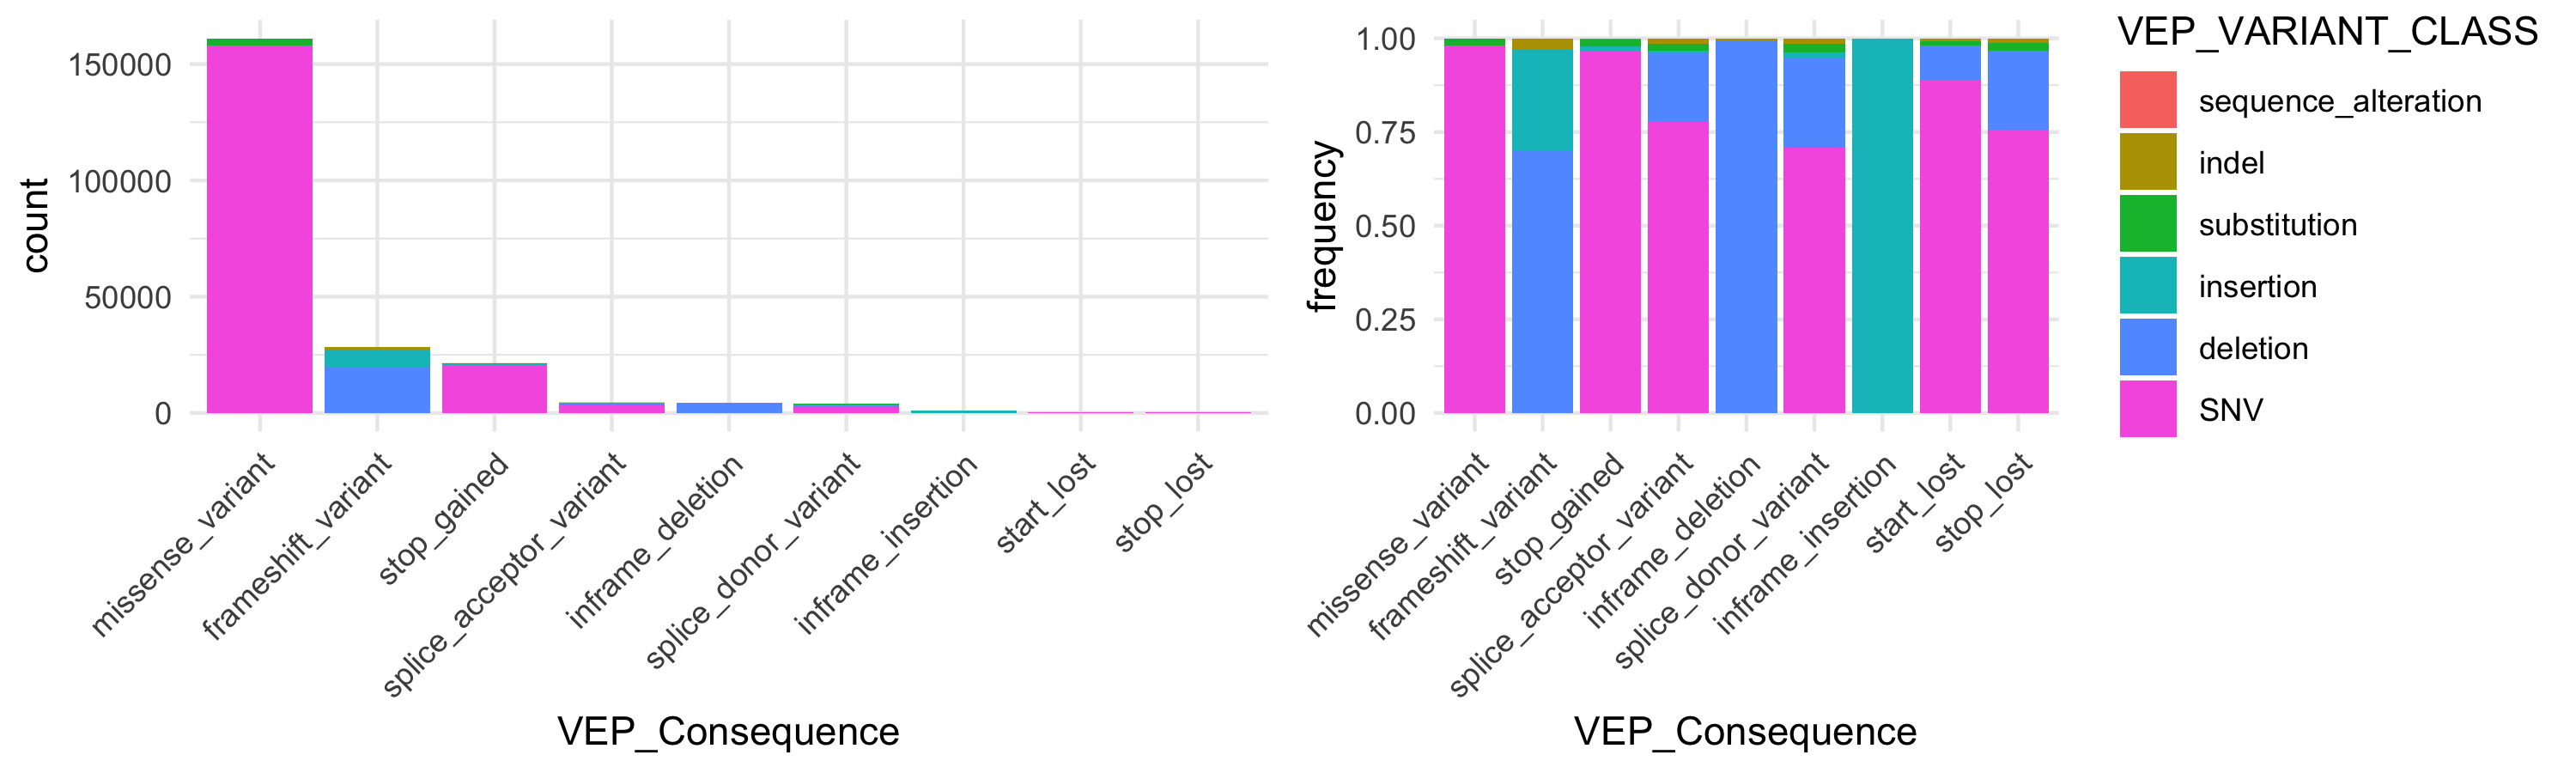

In [44]:
plot_contingency_table_as_histograms(impact, "VEP_Consequence", "VEP_VARIANT_CLASS")

## `VEP_VARIANT_CLASS` vs `confidence_class`

The following plots represent the distribution of the mutations grouped by `VEP_VARIANT_CLASS` over the `confidence_class`:

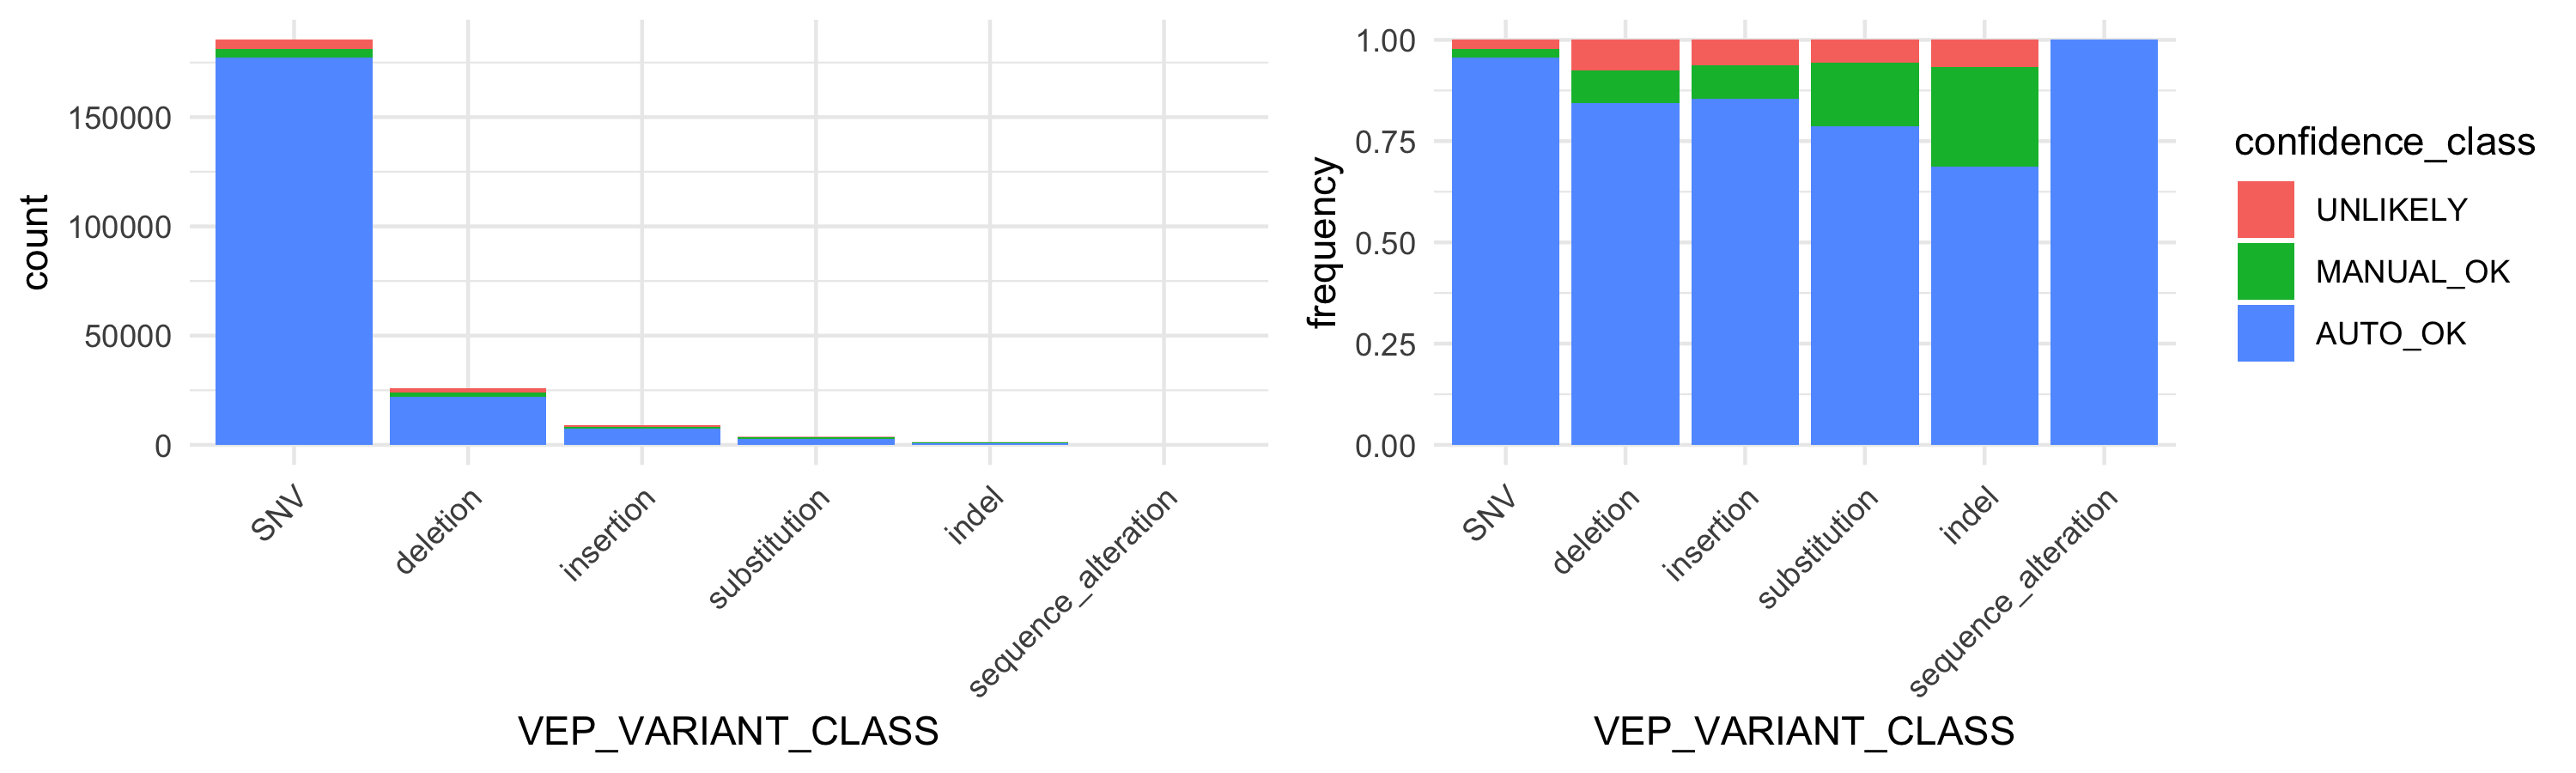

In [45]:
plot_contingency_table_as_histograms(impact, "VEP_VARIANT_CLASS", "confidence_class")